In [58]:
import params
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats  
import scipy.io
import matplotlib.patches as patches
from math import sqrt
from statsmodels.stats.power import TTestIndPower

In [2]:
data = pd.read_csv(params.preprocessed_output_dir + "/all_subjects.csv") # subject performance
# 8 parameters models values: temporal1, temporal2, temporal3, temporal4, spatial1, spatial2, spatial3, spatial4, NLL.
# 4 parameters models values: t1/s1, t2/s2, t3/s3, t4/s4, NLL.
# null model values: mean(answers), NLL. 
null_pred = scipy.io.loadmat(params.models_predictions_dir + 'null_pred.mat') # null model
mul_pred = scipy.io.loadmat(params.models_predictions_dir + 'mul_pred.mat') # multiplicative model 
mul_const_pred = scipy.io.loadmat(params.models_predictions_dir + 'mulConst_pred.mat') # multiplicative with constraint model 
min_pred = scipy.io.loadmat(params.models_predictions_dir + 'min_pred.mat') # minimum model
min_const_pred = scipy.io.loadmat(params.models_predictions_dir + 'minConst_pred.mat') # minimum with constraint model
mean_pred = scipy.io.loadmat(params.models_predictions_dir + 'mean_pred.mat') # meanimum model
mean_const_pred = scipy.io.loadmat(params.models_predictions_dir + 'meanConst_pred.mat') # meanimum with constraint model
tOnly_pred = scipy.io.loadmat(params.models_predictions_dir + 'tOnly_pred.mat') # temporal-only model
tOnly_const_pred = scipy.io.loadmat(params.models_predictions_dir + 'tOnlyConst_pred.mat') # temporal-only with constraint model
sOnly_pred = scipy.io.loadmat(params.models_predictions_dir + 'sOnly_pred.mat') # spatial-only model
sOnly_const_pred = scipy.io.loadmat(params.models_predictions_dir + 'sOnlyConst_pred.mat') # spatial-only with constraint model

In [3]:
# Spatial-only alteration block
# Line plot for each subject
data.filter(regex=("SpatialBlockL*")).T.plot()
plt.legend(data.subjectNum, fontsize="xx-small")
plt.xticks(range(0,len(list(data.filter(regex=("SpatialBlockL*")).columns))),['1','2','3','4'])
plt.xlabel("Alteration Level")
plt.ylabel("Self-Attribution (%)")
plt.title("Self-Attribution (%) per subject for each spatial alteration level")
plt.show()

# All Subjects boxplot, the green triangle in the boxplot stands for the mean
plot = sns.boxplot(data=data.filter(regex=("SpatialBlockL*")), showmeans=True)
plot.set(xlabel='Alteration Level', ylabel='Self-Attribution (%)', title = "Spatial Self-Attribution all subjects")
plot.set_xticklabels(['1','2','3','4'])
plt.show()

In [4]:
# Temporal-only alteration block
# Line plot for each subject
data.filter(regex=("TemporalBlockL\d+$")).T.plot()
plt.legend(data.subjectNum, fontsize="xx-small")
plt.xticks(range(0,len(list(data.filter(regex=("TemporalBlockL\d+$")).columns))),['1','2','3','4'])
plt.xlabel("Alteration Level")
plt.ylabel("Self-Attribution (%)")
plt.title("Self-Attribution (%) per subject for each temporal alteration level")
plt.show()

# All subjects boxplot, the green triangle in the boxplot stands for the mean.
plot = sns.boxplot(data=data.filter(regex=("TemporalBlockL\d+$")), showmeans = True)
plot.set(xlabel='Alteration Level', ylabel='Self-Attribution (%)', title = "Temporal Self-Attribution all subjects")
plot.set_xticklabels(['1','2','3','4'])
plt.show()

In [5]:
# Self-attribution heatmap across all combined blocks for all subjects, T - Temporal S - Spatial.
combined_data = data.filter(regex=("CombinedBlockT.S.")) # get data
combined_data = combined_data.mean(axis=0).to_frame().T # average the date
combined_data = combined_data.values.reshape(4, 4) # order in a 4 x 4 matrix
# Get column and index names
y = ['T{}'.format(t) for t in range(1, 5)]
x = ['S{}'.format(s) for s in range(1, 5)]

# Create heatmap with column and index names
plt.imshow(combined_data, cmap='hot', interpolation='nearest')
plt.xticks(range(len(x)), x, rotation=90)
plt.gca().xaxis.set_ticks_position('top')
plt.yticks(range(len(y)), y)
plt.colorbar()
for (j,i),label in np.ndenumerate(combined_data):
    plt.text(i,j,str(round(label,3)) + '%',ha='center',va='center', c='blue')
plt.xlabel('Spatial Alteration')
plt.gca().xaxis.set_label_coords(0.5, 1.12)
plt.ylabel('Temporal Alteration')
plt.title('% Self-Attribution combined part')
plt.show()

In [6]:
# SoA for left or right spatial alteration direction for combined_part + spatial_part
# All subjects boxplot
ax = sns.boxplot(data=data.filter(regex=("(?:Left|Right)SpatialTotal")), showmeans=True)
ax.set(xlabel='Alteration Direction', ylabel='Self-Attribution (%)', title = "Self-Attribution all subjects (combined & spatial)")
ax.set_ylim(0,100)
plt.show()

print(data.filter(regex=("(?:Left|Right)SpatialTotal"))) # detailed comparison per subject for deeper understanding

# statistical analysis
left = data.filter(regex=("LeftSpatialTotal$"))
right = data.filter(regex=("RightSpatialTotal$"))
t_statistic_para, p_value_para = stats.ttest_rel(left, right)
wilcoxon_statistic, wilcoxon_p_value = stats.wilcoxon(left, right)
print("Nonparametric wilcoxon test p-value: " + str(wilcoxon_p_value) + ", Parametric paired t-test p-value: " + str(p_value_para))  

    LeftSpatialTotal  RightSpatialTotal
0             44.444             56.566
1             16.162             26.263
2             25.253             13.131
3             36.364             45.455
4             44.444              4.040
5             32.323              5.051
6             43.434             20.202
7             49.495             35.354
8             59.596             21.212
9             26.263             14.141
10            12.121              3.030
11            17.172              8.081
12            49.495             34.343
13            19.192             13.131
14            35.354             40.404
15            70.707              4.040
Nonparametric wilcoxon test p-value: [0.00918579], Parametric paired t-test p-value: [0.01266245]


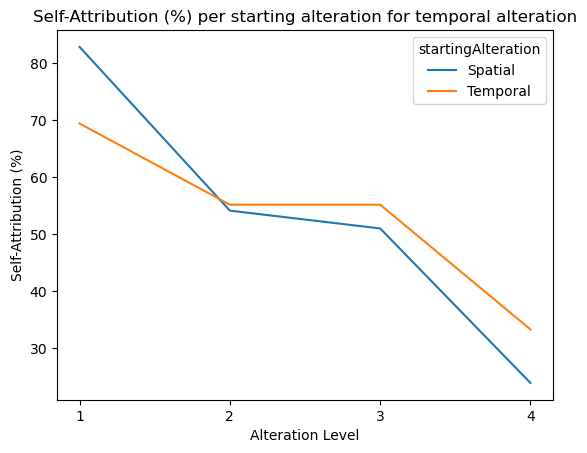

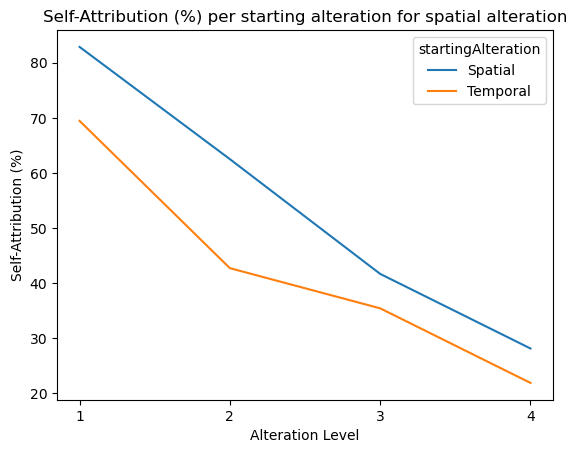

In [7]:
# Understanding the starting alteration effect (order effects), looking at the combined block results, 
# reminder: 1st & 2nd blocks are counterbalanced.
grouped_data = data.groupby('startingAlteration').mean()
# Temporal
grouped_data.filter(regex=("CombinedBlockT.S1")).T.plot()
plt.xticks(range(0,len(list(grouped_data.filter(regex=("TemporalBlockL\d+$")).columns))),['1','2','3','4'])
plt.xlabel("Alteration Level")
plt.ylabel("Self-Attribution (%)")
plt.title("Self-Attribution (%) per starting alteration for temporal alteration")
plt.show()

# Spatial
grouped_data.filter(regex=("CombinedBlockT1S.")).T.plot()
plt.xticks(range(0,len(list(grouped_data.filter(regex=("SpatialBlockL\d+$")).columns))),['1','2','3','4'])
plt.xlabel("Alteration Level")
plt.ylabel("Self-Attribution (%)")
plt.title("Self-Attribution (%) per starting alteration for spatial alteration")
plt.show()

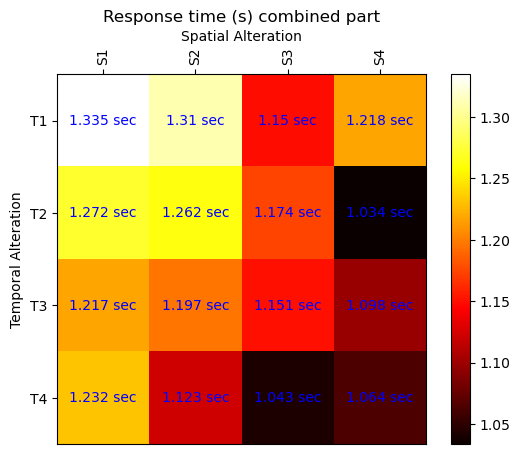

In [8]:
# reaction time heatmap per combination, T - Temporal S - Spatial.
combined_data = data.filter(regex=("ResponseTimeT.S.")) # get data
combined_data = combined_data.mean(axis=0).to_frame().T # average the data
combined_data = combined_data.values.reshape(4, 4) # reshape into 4 x 4 matrix
# Get column and index names
y = ['T{}'.format(t) for t in range(1, 5)]
x = ['S{}'.format(s) for s in range(1, 5)]

# Create heatmap with column and index names
plt.imshow(combined_data, cmap='hot', interpolation='nearest')
plt.xticks(range(len(x)), x, rotation=90)
plt.gca().xaxis.set_ticks_position('top')
plt.yticks(range(len(y)), y)
plt.colorbar()
for (j,i),label in np.ndenumerate(combined_data):
    plt.text(i,j,str(round(label,3)) + " sec",ha='center',va='center', c='blue')
plt.xlabel('Spatial Alteration')
plt.gca().xaxis.set_label_coords(0.5, 1.12)
plt.ylabel('Temporal Alteration')
plt.title('Response time (s) combined part')
plt.show()

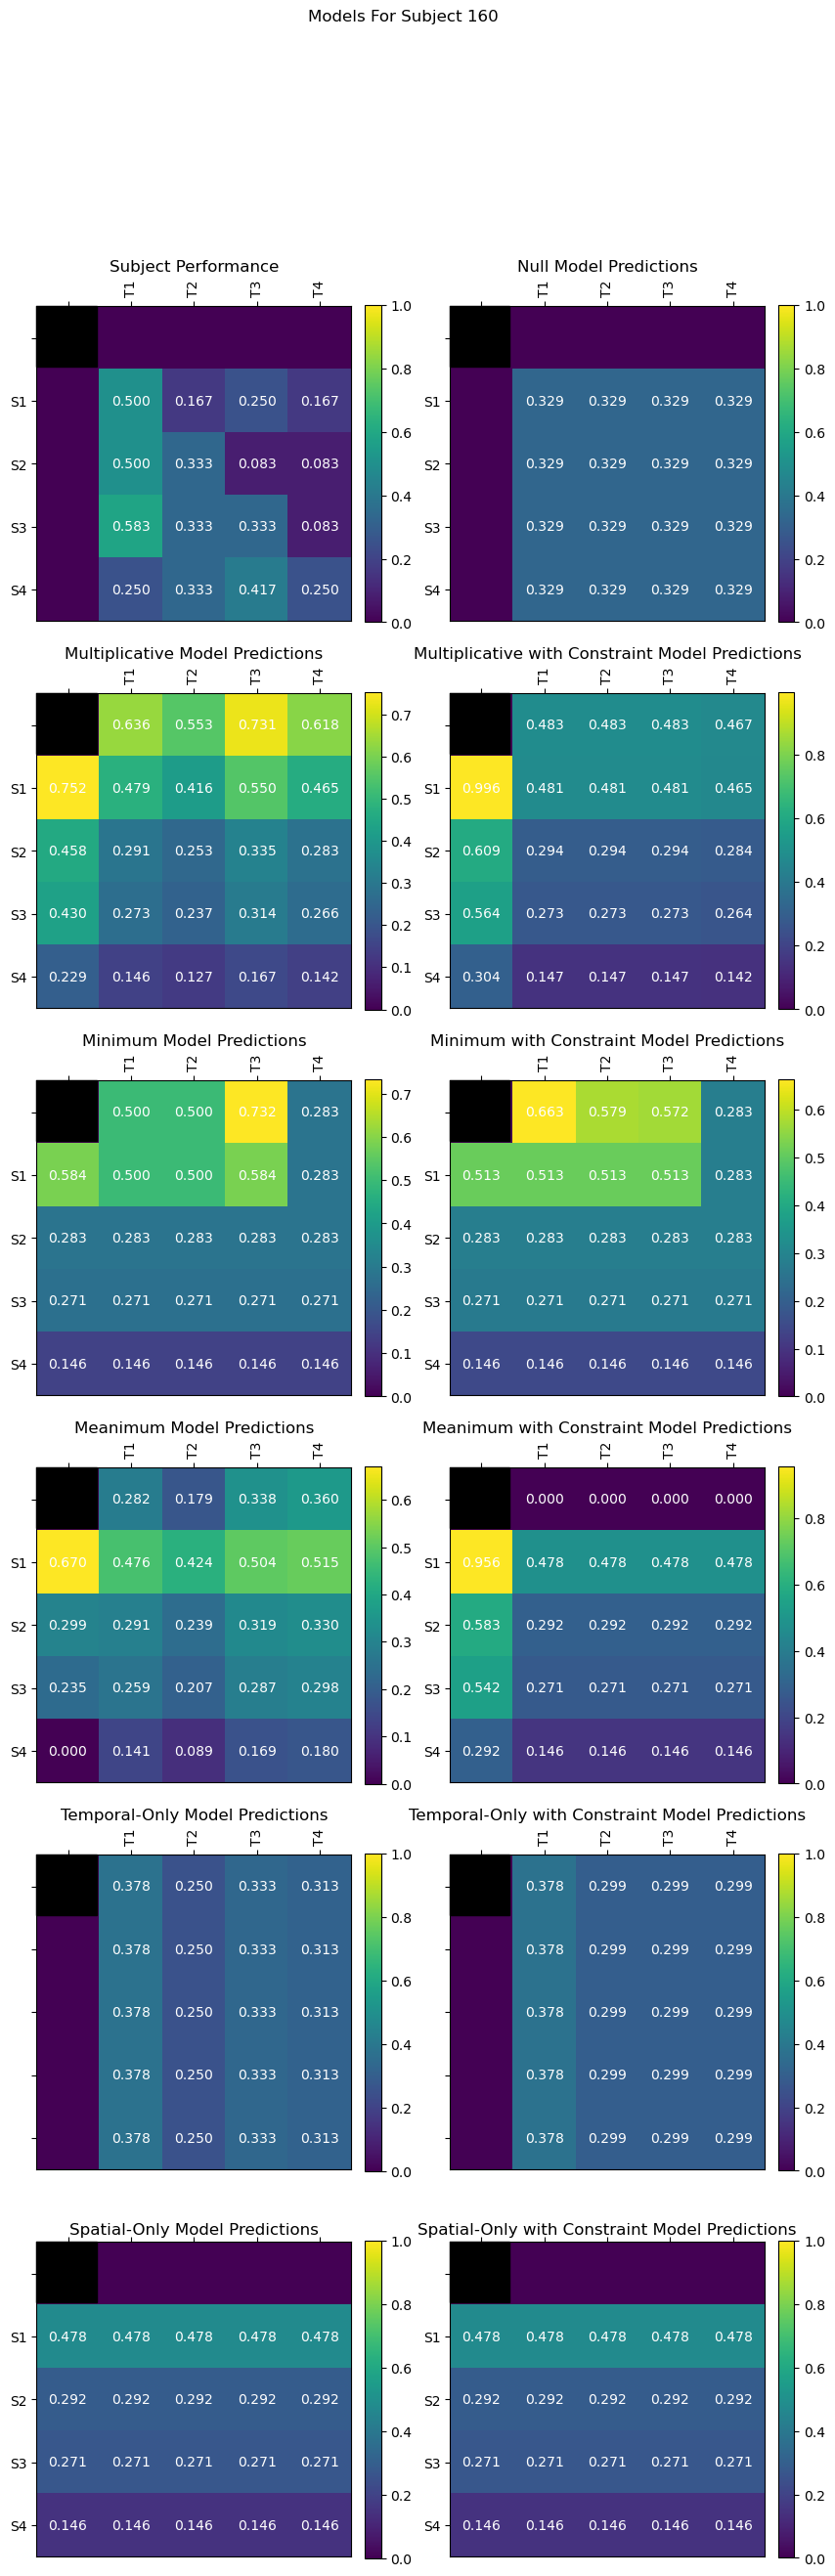

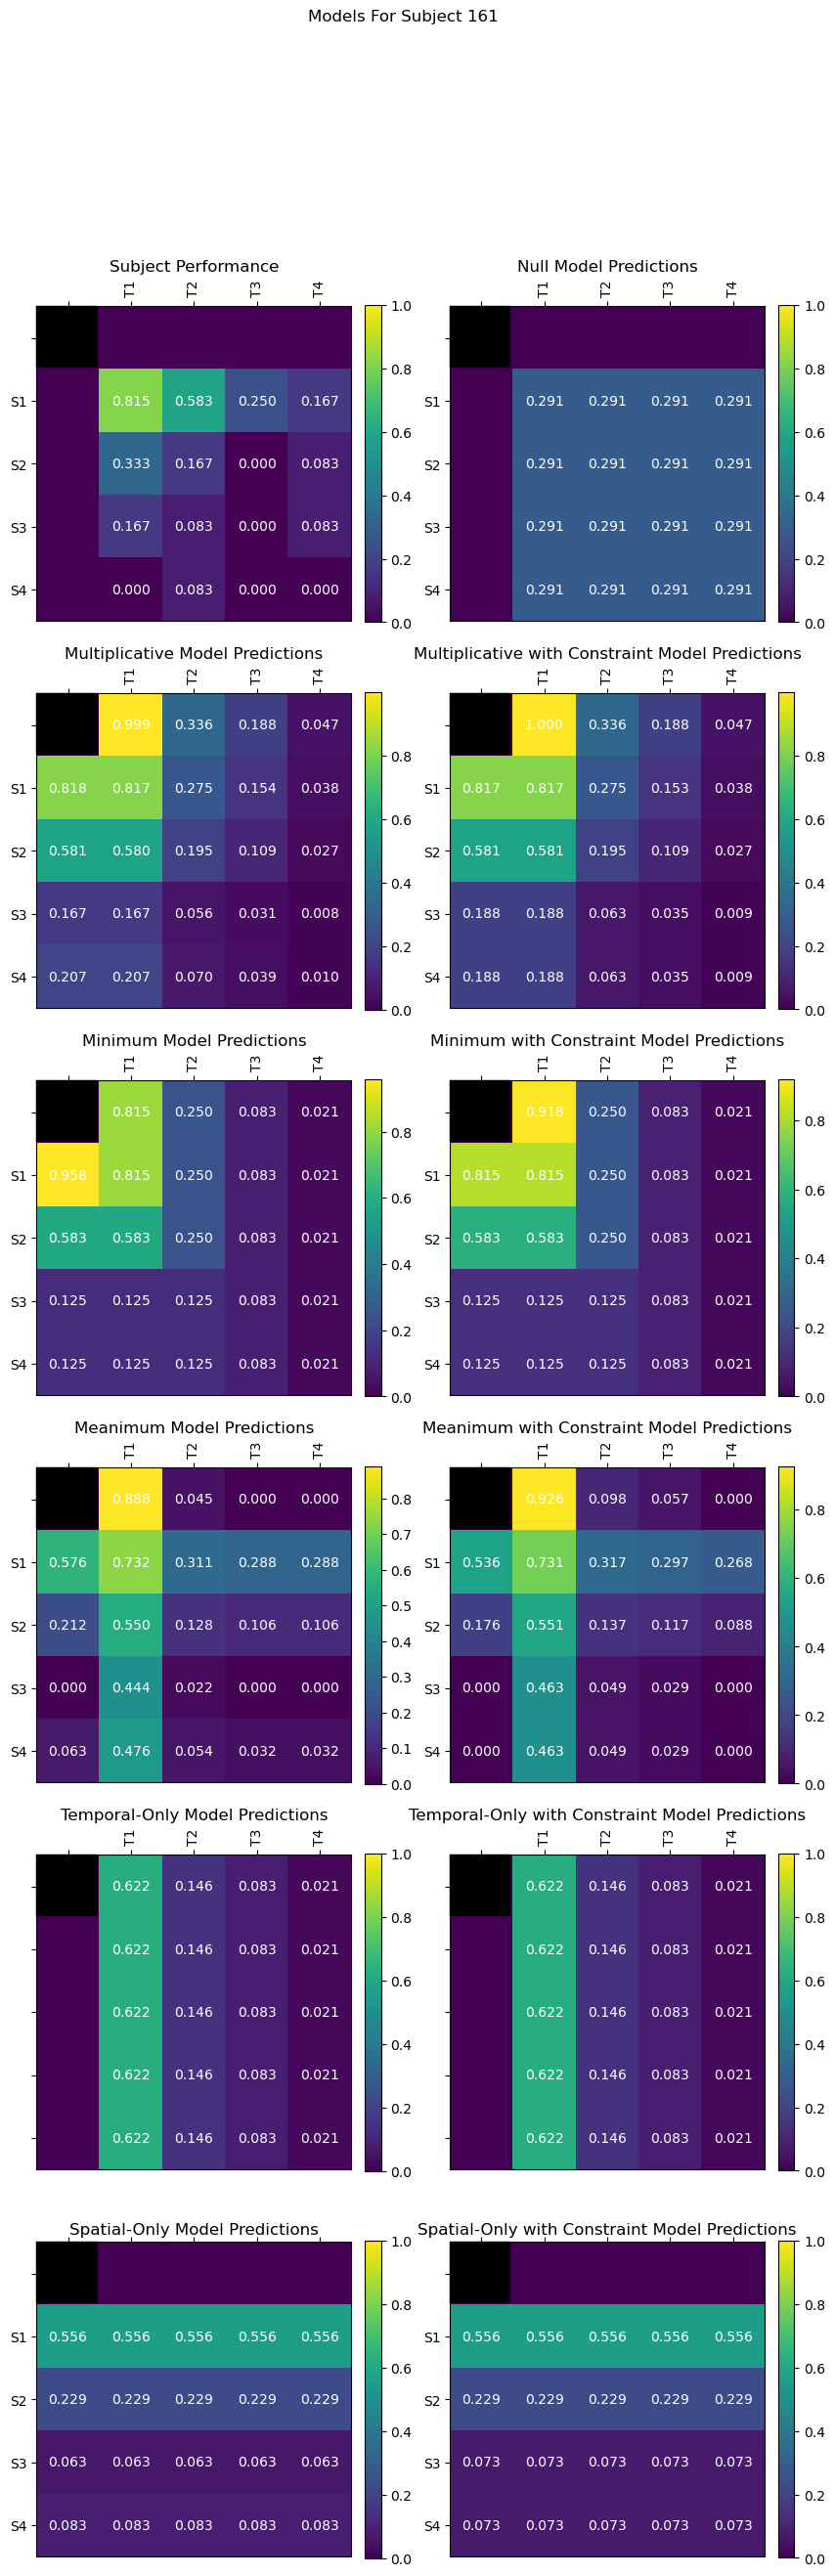

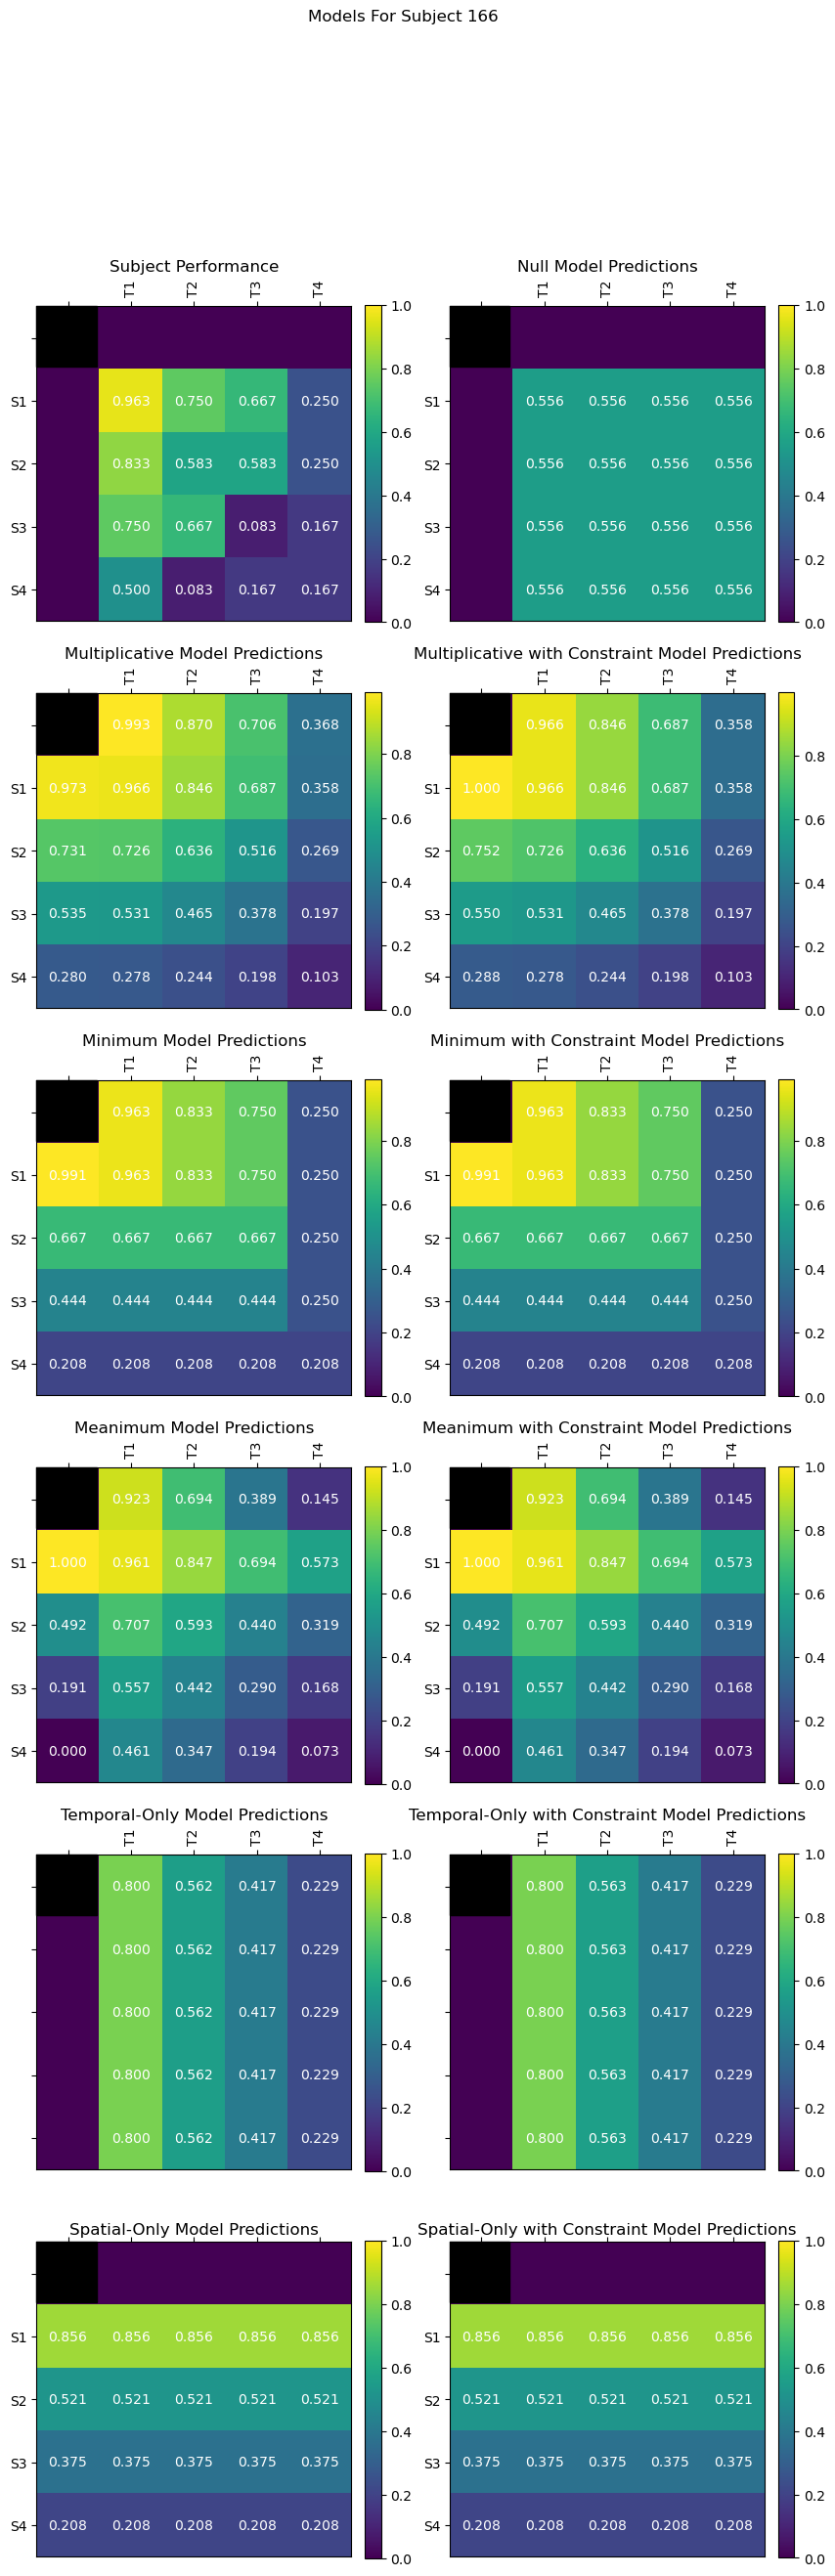

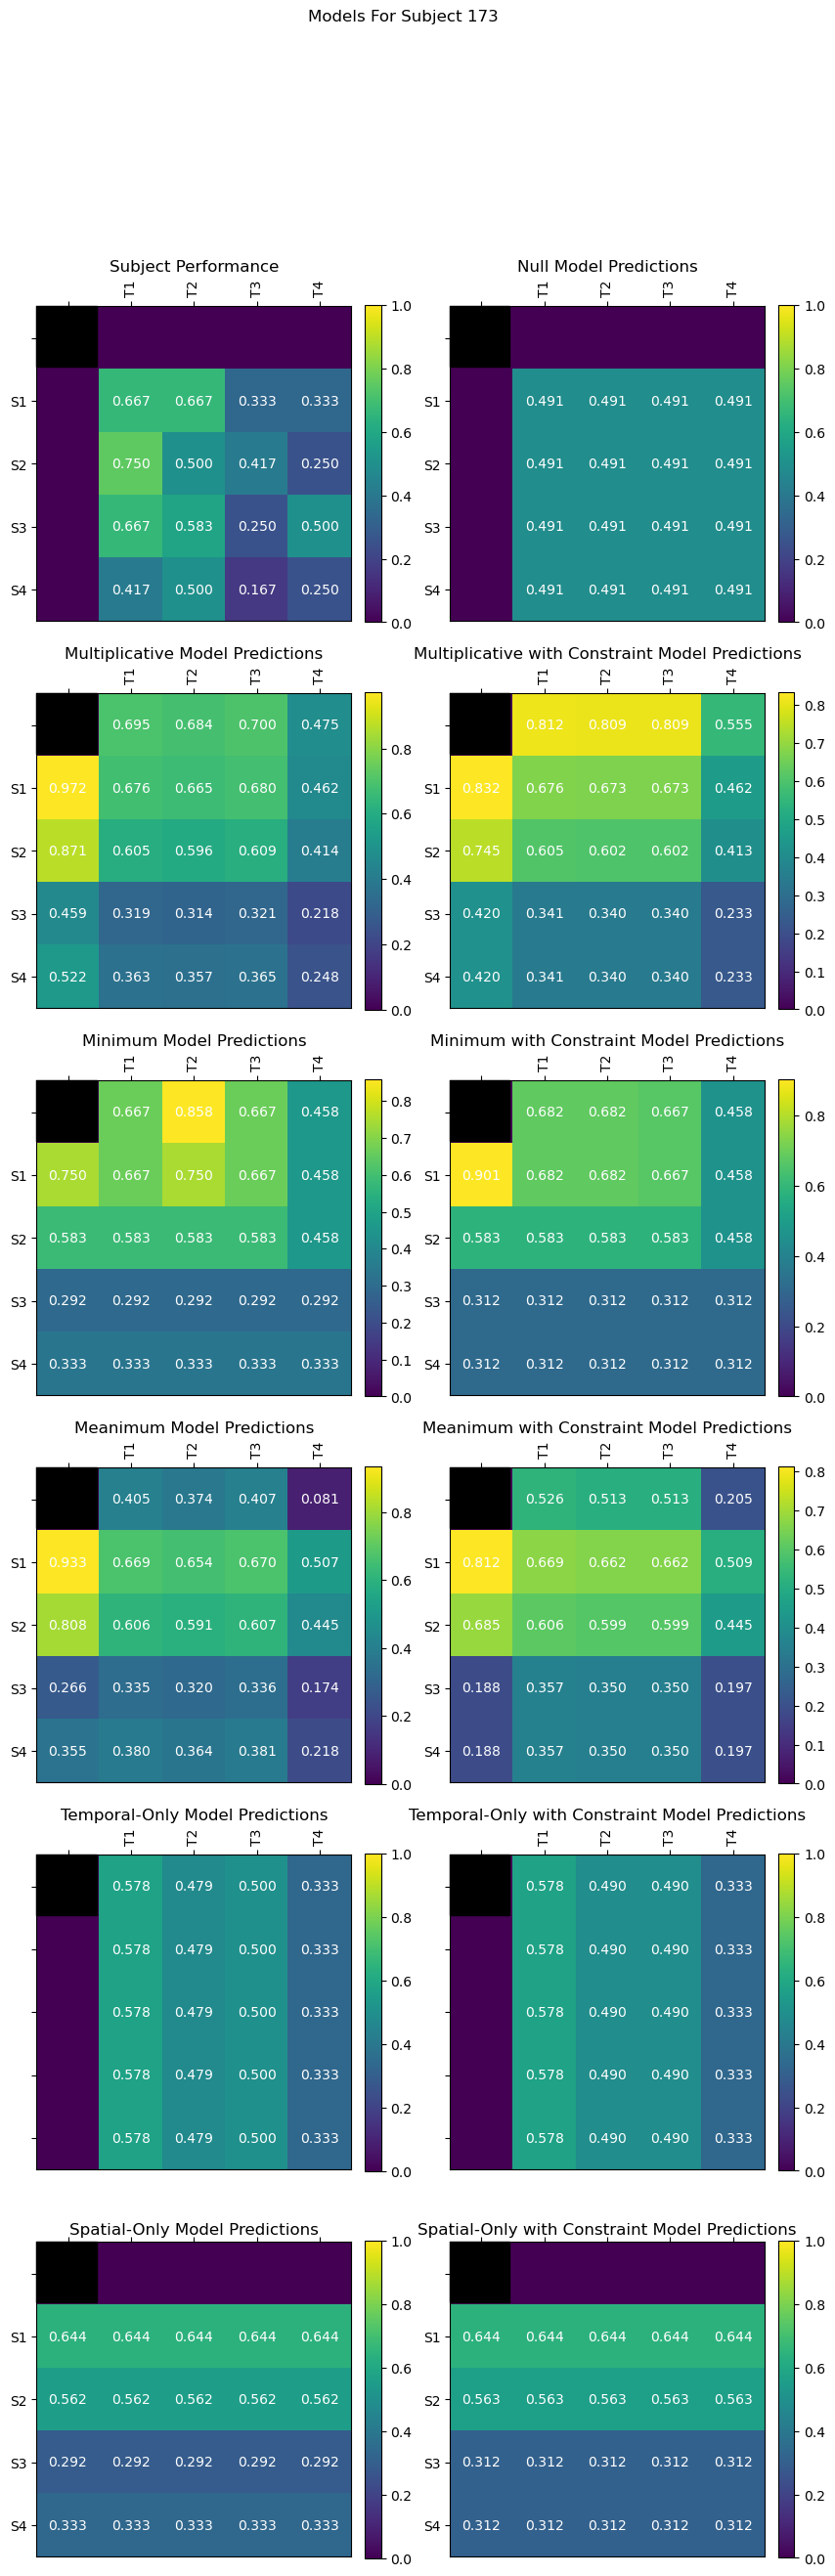

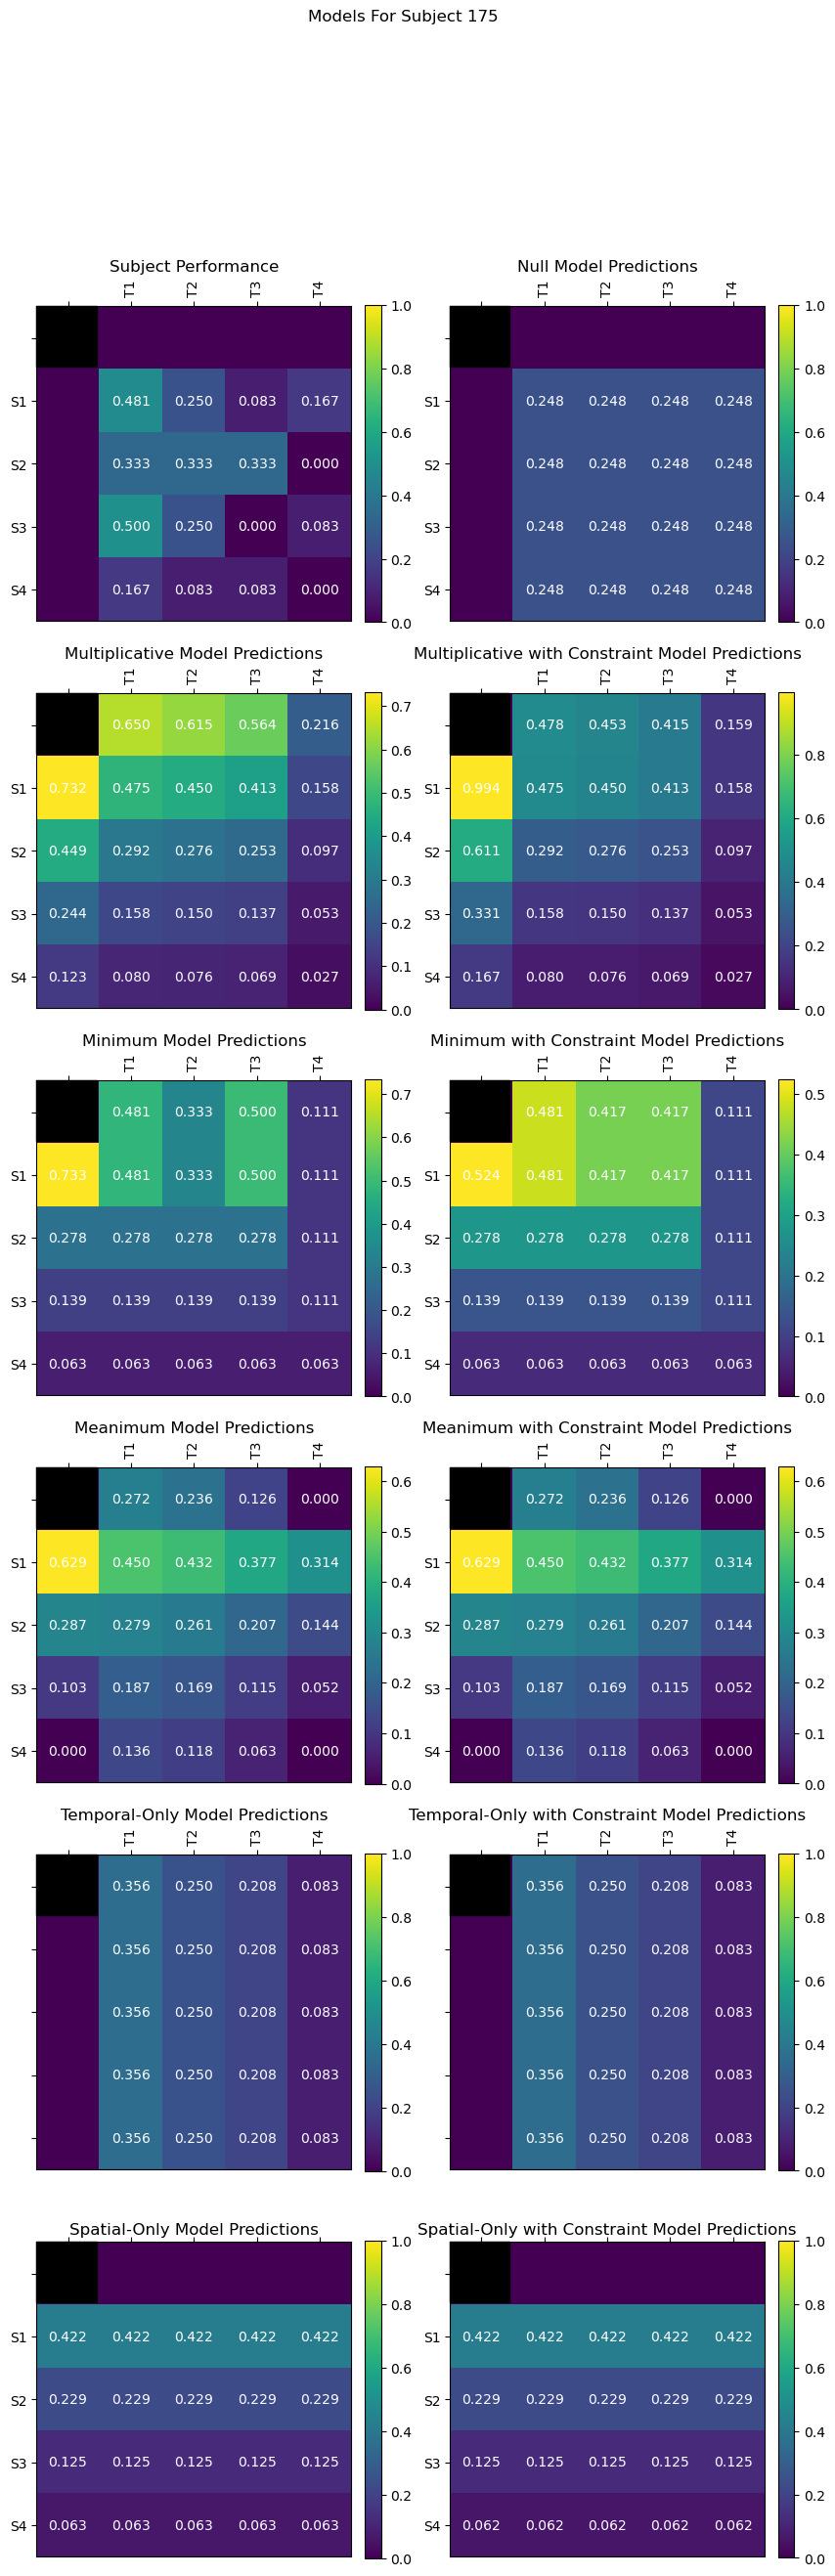

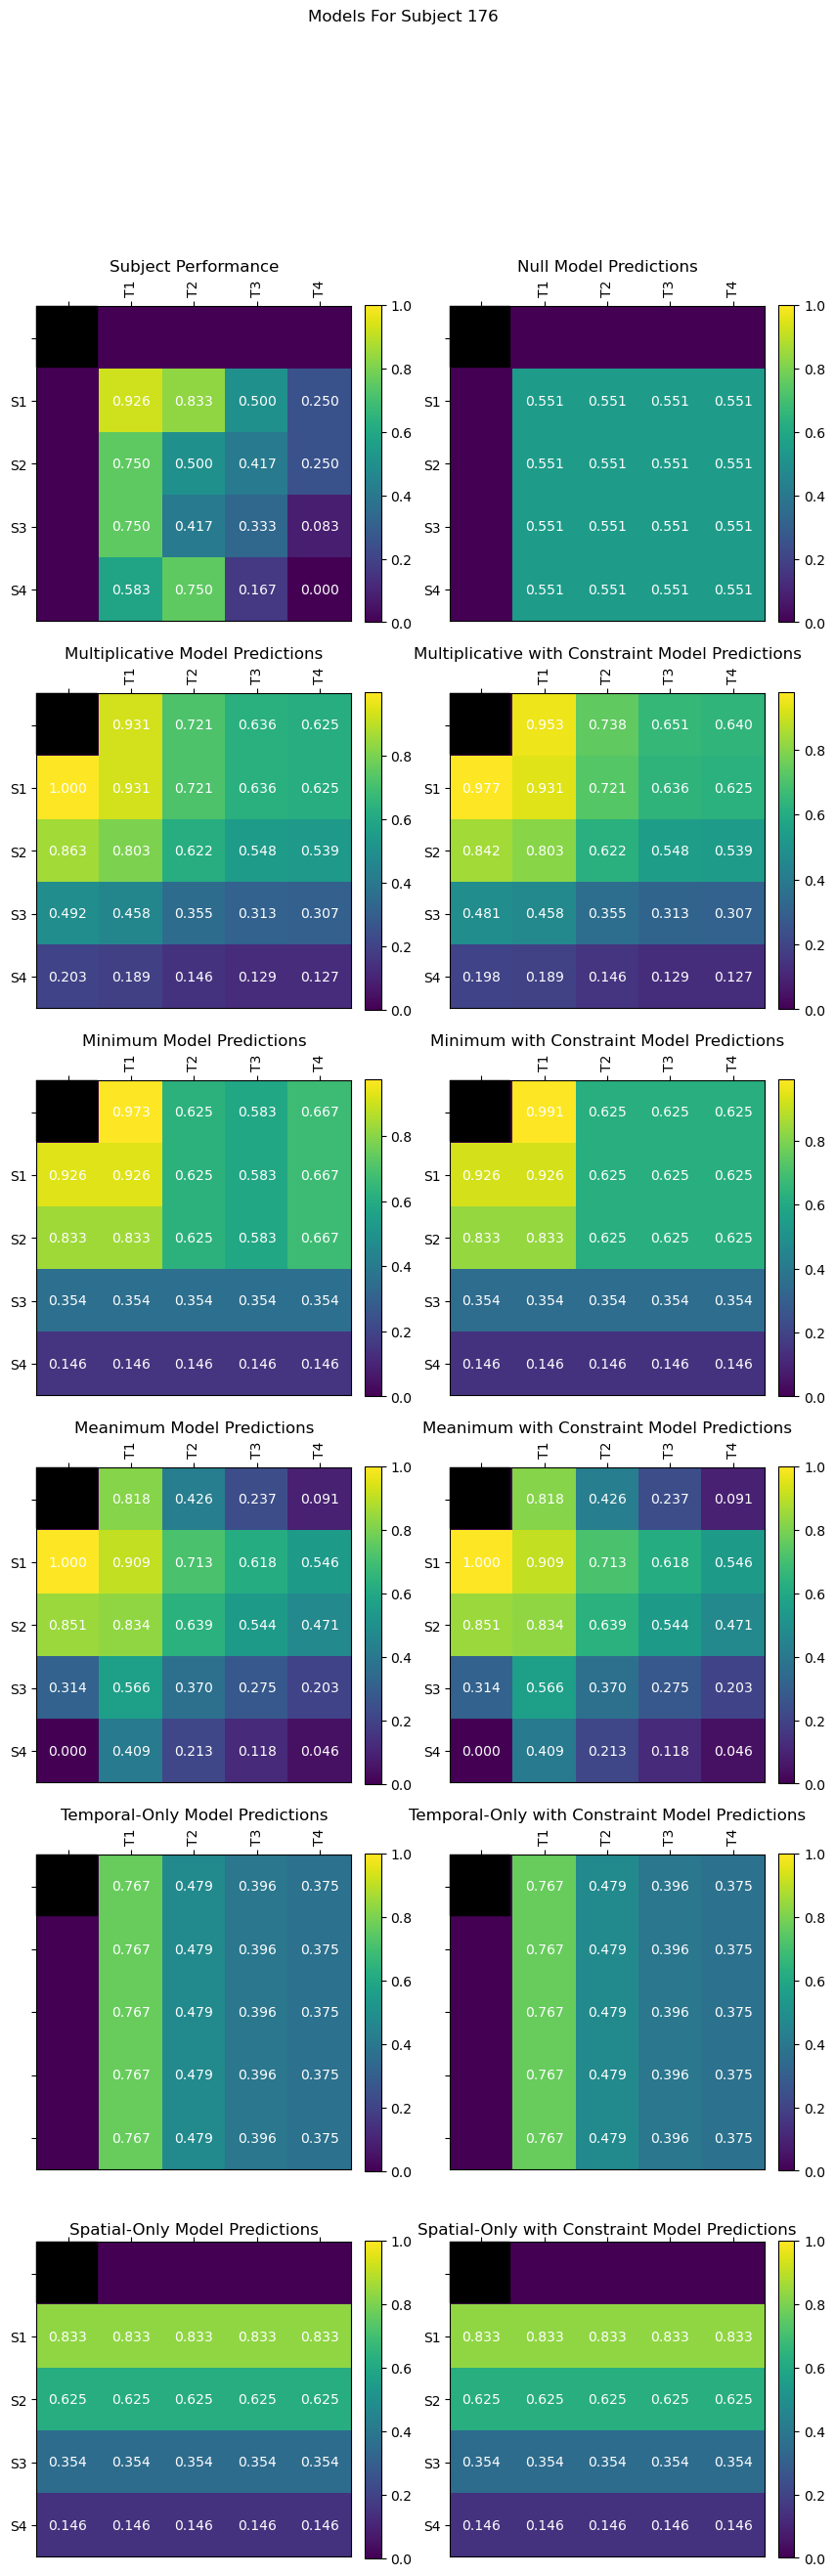

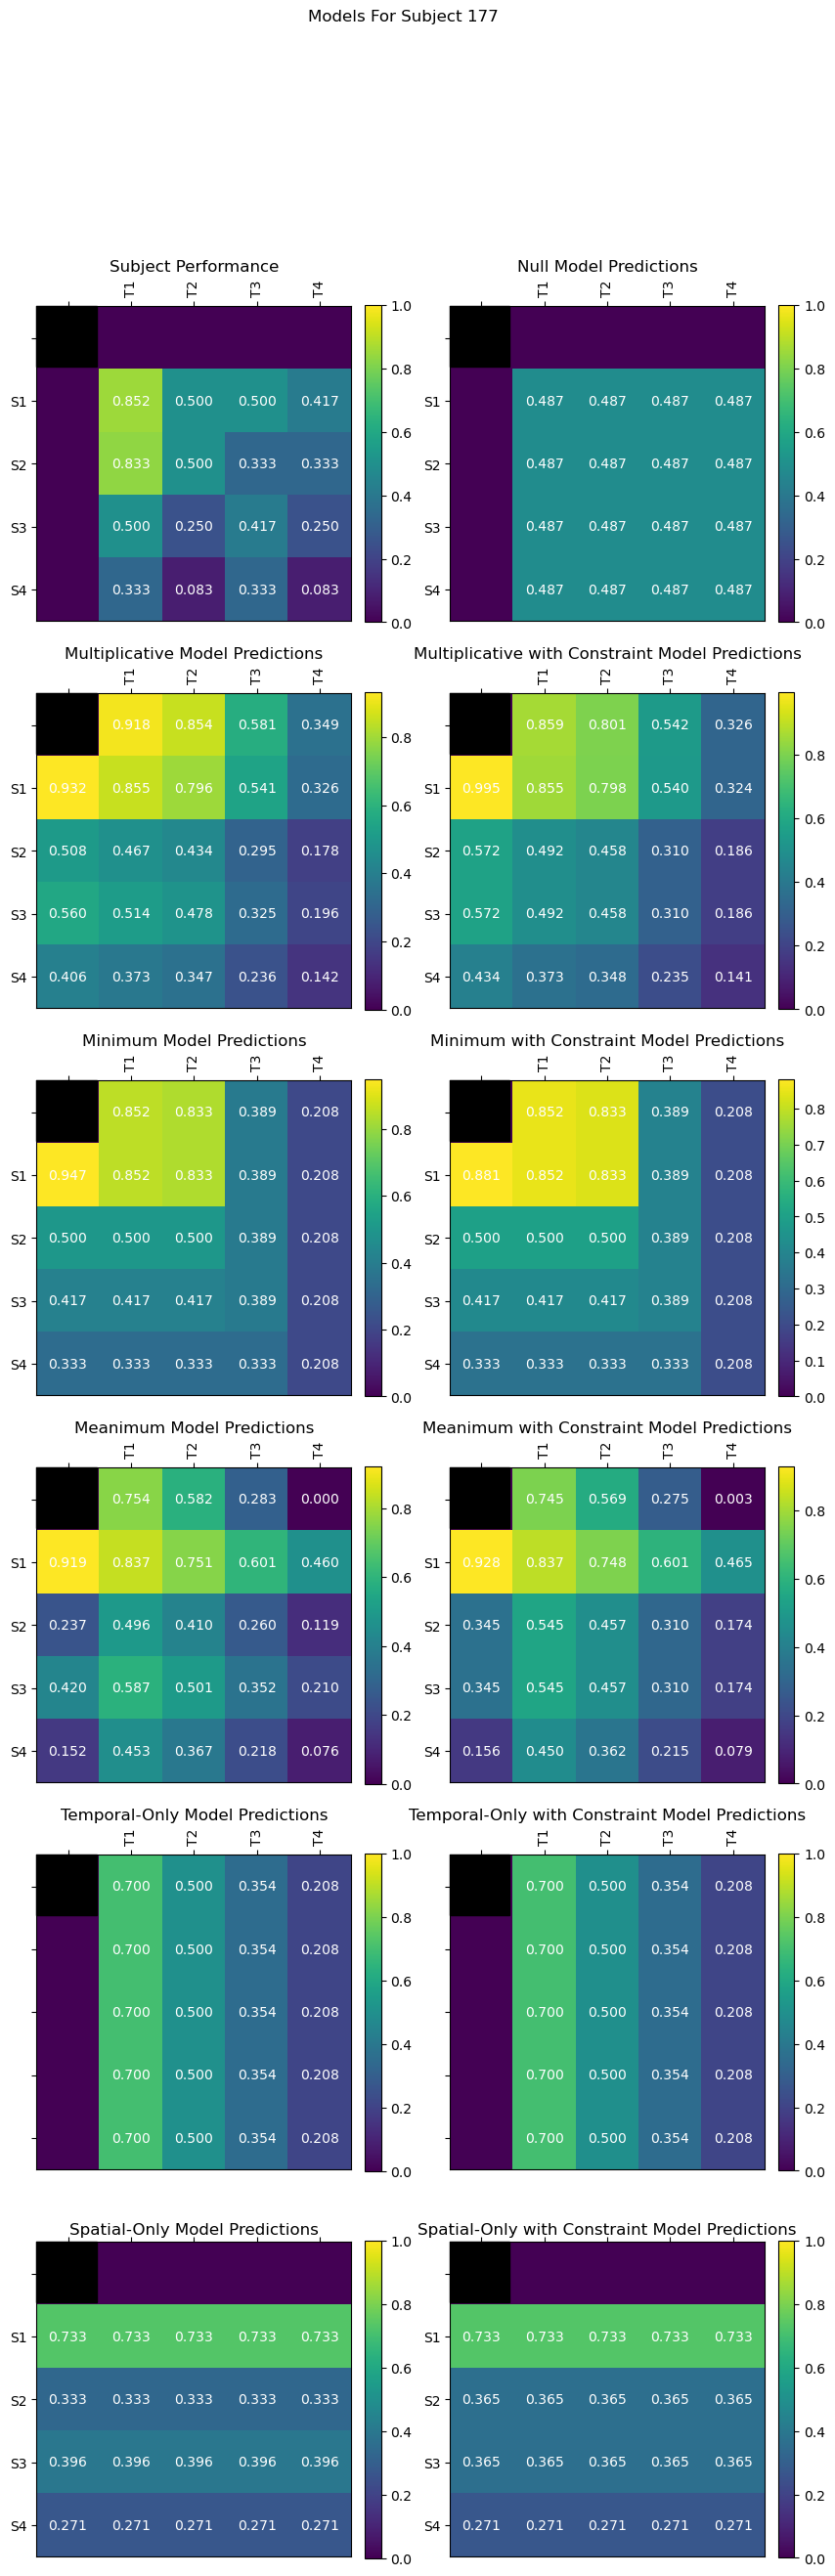

In [9]:
# Subject Performance and Models Predictions for each subject.
subjects = [key for key in mul_const_pred if not key.startswith('__')] # remove matlab headers
for subject in subjects:
    subjectID = subject.split('Sub')[1]
    plt.figure(figsize=(10, 30))
    plt.suptitle('Models For Subject ' + str(subjectID))
    
    # Subject Performance
    plt.subplot(6, 2, 1) # 6 rows 2 columns
    perf_data = data[data['subjectID'] == int(subjectID)].filter(regex=r'^CombinedBlock', axis=1)
    perf_data_deci = perf_data / 100
    reshaped_data = perf_data_deci.values.reshape(4, 4)
    fivebyfivemat = np.full((5, 5), -1.0)
    fivebyfivemat[1:5, 1:5] = reshaped_data
    
    # Create heatmap with column and index names
    plt.imshow(fivebyfivemat, cmap='viridis', vmin=0, vmax=1)
    plt.xticks(range(5), ['', 'T1', 'T2', 'T3', 'T4'] , rotation=90)
    plt.yticks(range(5), ['', 'S1', 'S2', 'S3', 'S4'])
    plt.gca().xaxis.set_ticks_position('top')
    plt.gca().add_patch(patches.Rectangle((-0.5, -0.5), 0.95, 0.95, facecolor='black', edgecolor='black', fill=True, clip_on=False))
    plt.colorbar(fraction=0.046, pad=0.04)
    for i in range(1, 5):
        for j in range(1, 5):
            plt.text(j, i, f'{fivebyfivemat[i, j]:.3f}', ha='center', va='center', color='w')
    
    plt.title("Subject Performance")
    
    # Null model
    
    plt.subplot(6, 2, 2)
    meananswers = null_pred[subject][0][0]
    fivebyfivemat = np.full((5, 5), -1.0)
    fivebyfivemat[1:5, 1:5] = meananswers
    
    # Create heatmap with column and index names
    plt.imshow(fivebyfivemat, cmap='viridis', vmin=0, vmax=1)
    plt.xticks(range(5), ['', 'T1', 'T2', 'T3', 'T4'] , rotation=90)
    plt.yticks(range(5), ['', 'S1', 'S2', 'S3', 'S4'])
    plt.gca().xaxis.set_ticks_position('top')
    plt.gca().add_patch(patches.Rectangle((-0.5, -0.5), 0.95, 0.95, facecolor='black', edgecolor='black', fill=True, clip_on=False))
    plt.colorbar(fraction=0.046, pad=0.04)
    for i in range(1, 5):
        for j in range(1, 5):
            plt.text(j, i, f'{fivebyfivemat[i, j]:.3f}', ha='center', va='center', color='w')
    
    plt.title("Null Model Predictions")
    
    # Multiplicative
    plt.subplot(6, 2, 3)
    temporal_values = mul_pred[subject][0][:4]
    spatial_values = mul_pred[subject][0][4:8]

    matrix = np.zeros((5, 5))
    matrix[0, 1:5] = temporal_values # outer row
    matrix[1:5, 0] = spatial_values # outer col

    # Fill in the 4x4 inner matrix with multiplications between the domains
    for i in range(1, 5):
        for j in range(1, 5):
            matrix[i, j] = temporal_values[j - 1] * spatial_values[i - 1]

    # Plot the matrix
    plt.imshow(matrix, cmap='viridis')
    plt.colorbar(fraction=0.046, pad=0.04)
    plt.title("Multiplicative Model Predictions")
    for i in range(5):
        for j in range(5):
            if (i == 0) & (j == 0):
                continue
            else:
                plt.text(j, i, f'{matrix[i, j]:.3f}', ha='center', va='center', color='w')
    plt.xticks(range(5), ['', 'T1', 'T2', 'T3', 'T4'] , rotation=90)
    plt.yticks(range(5), ['', 'S1', 'S2', 'S3', 'S4'])
    plt.gca().xaxis.set_ticks_position('top')
    plt.gca().add_patch(patches.Rectangle((-0.5, -0.5), 0.95, 0.95, facecolor='black', edgecolor='black', fill=True, clip_on=False))
    
    # Multiplicative with Constraint.
    plt.subplot(6, 2, 4)
    temporal_values = mul_const_pred[subject][0][:4]
    spatial_values = mul_const_pred[subject][0][4:8]

    matrix = np.zeros((5, 5))
    matrix[0, 1:5] = temporal_values # outer row
    matrix[1:5, 0] = spatial_values # outer col

    # Fill in the 4x4 inner matrix with multiplications between the domains
    for i in range(1, 5):
        for j in range(1, 5):
            matrix[i, j] = temporal_values[j - 1] * spatial_values[i - 1]

    # Plot the matrix
    plt.imshow(matrix, cmap='viridis')
    plt.colorbar(fraction=0.046, pad=0.04)
    plt.title("Multiplicative with Constraint Model Predictions")
    for i in range(5):
        for j in range(5):
            if (i == 0) & (j == 0):
                continue
            else:
                plt.text(j, i, f'{matrix[i, j]:.3f}', ha='center', va='center', color='w')
    plt.xticks(range(5), ['', 'T1', 'T2', 'T3', 'T4'] , rotation=90)
    plt.yticks(range(5), ['', 'S1', 'S2', 'S3', 'S4'])
    plt.gca().xaxis.set_ticks_position('top')
    plt.gca().add_patch(patches.Rectangle((-0.5, -0.5), 0.95, 0.95, facecolor='black', edgecolor='black', fill=True, clip_on=False))
    
    # Minimum model
    
    plt.subplot(6, 2, 5)
    temporal_values = min_pred[subject][0][:4]
    spatial_values = min_pred[subject][0][4:8]

    matrix = np.zeros((5, 5))
    matrix[0, 1:5] = temporal_values # outer row
    matrix[1:5, 0] = spatial_values # outer col

    # Fill in the 4x4 inner matrix with minimum between the domains
    for i in range(1, 5):
        for j in range(1, 5):
            matrix[i, j] = min(temporal_values[j - 1], spatial_values[i - 1])

    # Plot the matrix
    plt.imshow(matrix, cmap='viridis')
    plt.colorbar(fraction=0.046, pad=0.04)
    plt.title("Minimum Model Predictions")
    for i in range(5):
        for j in range(5):
            if (i == 0) & (j == 0):
                continue
            else:
                plt.text(j, i, f'{matrix[i, j]:.3f}', ha='center', va='center', color='w')
    plt.xticks(range(5), ['', 'T1', 'T2', 'T3', 'T4'] , rotation=90)
    plt.yticks(range(5), ['', 'S1', 'S2', 'S3', 'S4'])
    plt.gca().xaxis.set_ticks_position('top')
    plt.gca().add_patch(patches.Rectangle((-0.5, -0.5), 0.95, 0.95, facecolor='black', edgecolor='black', fill=True, clip_on=False))
    
    # Minimum With Constraint model
    plt.subplot(6, 2, 6)
    temporal_values = min_const_pred[subject][0][:4]
    spatial_values = min_const_pred[subject][0][4:8]

    matrix = np.zeros((5, 5))
    matrix[0, 1:5] = temporal_values # outer row
    matrix[1:5, 0] = spatial_values # outer col

    # Fill in the 4x4 inner matrix with minimum between the domains
    for i in range(1, 5):
        for j in range(1, 5):
            matrix[i, j] = min(temporal_values[j - 1], spatial_values[i - 1])

    # Plot the matrix
    plt.imshow(matrix, cmap='viridis')
    plt.colorbar(fraction=0.046, pad=0.04)
    plt.title("Minimum with Constraint Model Predictions")
    for i in range(5):
        for j in range(5):
            if (i == 0) & (j == 0):
                continue
            else:
                plt.text(j, i, f'{matrix[i, j]:.3f}', ha='center', va='center', color='w')
    plt.xticks(range(5), ['', 'T1', 'T2', 'T3', 'T4'] , rotation=90)
    plt.yticks(range(5), ['', 'S1', 'S2', 'S3', 'S4'])
    plt.gca().xaxis.set_ticks_position('top')
    plt.gca().add_patch(patches.Rectangle((-0.5, -0.5), 0.95, 0.95, facecolor='black', edgecolor='black', fill=True, clip_on=False))
    
    # Meanimum model
    
    plt.subplot(6, 2, 7)
    temporal_values = mean_pred[subject][0][:4]
    spatial_values = mean_pred[subject][0][4:8]

    matrix = np.zeros((5, 5))
    matrix[0, 1:5] = temporal_values # outer row
    matrix[1:5, 0] = spatial_values # outer col

    # Fill in the 4x4 inner matrix with mean between the domains
    for i in range(1, 5):
        for j in range(1, 5):
            matrix[i, j] = np.mean([temporal_values[j - 1], spatial_values[i - 1]])

    # Plot the matrix
    plt.imshow(matrix, cmap='viridis')
    plt.colorbar(fraction=0.046, pad=0.04)
    plt.title("Meanimum Model Predictions")
    for i in range(5):
        for j in range(5):
            if (i == 0) & (j == 0):
                continue
            else:
                plt.text(j, i, f'{matrix[i, j]:.3f}', ha='center', va='center', color='w')
    plt.xticks(range(5), ['', 'T1', 'T2', 'T3', 'T4'] , rotation=90)
    plt.yticks(range(5), ['', 'S1', 'S2', 'S3', 'S4'])
    plt.gca().xaxis.set_ticks_position('top')
    plt.gca().add_patch(patches.Rectangle((-0.5, -0.5), 0.95, 0.95, facecolor='black', edgecolor='black', fill=True, clip_on=False))
    
    # Meanimum With Constraint model
    plt.subplot(6, 2, 8)
    temporal_values = mean_const_pred[subject][0][:4]
    spatial_values = mean_const_pred[subject][0][4:8]

    matrix = np.zeros((5, 5))
    matrix[0, 1:5] = temporal_values # outer row
    matrix[1:5, 0] = spatial_values # outer col

    # Fill in the 4x4 inner matrix with mean between the domains
    for i in range(1, 5):
        for j in range(1, 5):
            matrix[i, j] = np.mean([temporal_values[j - 1], spatial_values[i - 1]])

    # Plot the matrix
    plt.imshow(matrix, cmap='viridis')
    plt.colorbar(fraction=0.046, pad=0.04)
    plt.title("Meanimum with Constraint Model Predictions")
    for i in range(5):
        for j in range(5):
            if (i == 0) & (j == 0):
                continue
            else:
                plt.text(j, i, f'{matrix[i, j]:.3f}', ha='center', va='center', color='w')
    plt.xticks(range(5), ['', 'T1', 'T2', 'T3', 'T4'] , rotation=90)
    plt.yticks(range(5), ['', 'S1', 'S2', 'S3', 'S4'])
    plt.gca().xaxis.set_ticks_position('top')
    plt.gca().add_patch(patches.Rectangle((-0.5, -0.5), 0.95, 0.95, facecolor='black', edgecolor='black', fill=True, clip_on=False))
    
    # Temporal-only model
    
    plt.subplot(6, 2, 9)
    temporal_values = tOnly_pred[subject][0][:4]
    
    matrix = np.zeros((5, 5))
    matrix[0, 1:5] = temporal_values # outer row
    matrix[1:5, 0] = -1.0 #  empty outer col
    
    # Fill in the 4x4 inner matrix with the values of the temporal domain
    for i in range(1, 5):
        for j in range(1, 5):
            matrix[i, j] = temporal_values[j - 1]
    
    # Create heatmap with column and index names
    plt.imshow(matrix, cmap='viridis', vmin=0, vmax=1)
    plt.xticks(range(5), ['', 'T1', 'T2', 'T3', 'T4'] , rotation=90)
    plt.yticks(range(5), ['', '', '', '', ''])
    plt.gca().xaxis.set_ticks_position('top')
    plt.gca().add_patch(patches.Rectangle((-0.5, -0.5), 0.95, 0.95, facecolor='black', edgecolor='black', fill=True, clip_on=False))
    plt.colorbar(fraction=0.046, pad=0.04)
    for i in range(5):
        for j in range(1,5):
            if (i == 0) & (j == 0):
                continue
            else:
                plt.text(j, i, f'{matrix[i, j]:.3f}', ha='center', va='center', color='w')
    
    plt.title("Temporal-Only Model Predictions")
    
    # Temporal-only with constraint model
    
    plt.subplot(6, 2, 10)
    temporal_values = tOnly_const_pred[subject][0][:4]
    
    matrix = np.zeros((5, 5))
    matrix[0, 1:5] = temporal_values # outer row
    matrix[1:5, 0] = -1.0 #  empty outer col
    
    # Fill in the 4x4 inner matrix with the values of the temporal domain
    for i in range(1, 5):
        for j in range(1, 5):
            matrix[i, j] = temporal_values[j - 1]
    
    # Create heatmap with column and index names
    plt.imshow(matrix, cmap='viridis', vmin=0, vmax=1)
    plt.xticks(range(5), ['', 'T1', 'T2', 'T3', 'T4'] , rotation=90)
    plt.yticks(range(5), ['', '', '', '', ''])
    plt.gca().xaxis.set_ticks_position('top')
    plt.gca().add_patch(patches.Rectangle((-0.5, -0.5), 0.95, 0.95, facecolor='black', edgecolor='black', fill=True, clip_on=False))
    plt.colorbar(fraction=0.046, pad=0.04)
    for i in range(5):
        for j in range(1,5):
            if (i == 0) & (j == 0):
                continue
            else:
                plt.text(j, i, f'{matrix[i, j]:.3f}', ha='center', va='center', color='w')
    
    plt.title("Temporal-Only with Constraint Model Predictions")
    
    # Spatial-only model
    
    plt.subplot(6, 2, 11)
    spatial_values = sOnly_pred[subject][0][:4]
    
    matrix = np.zeros((5, 5))
    matrix[0, 1:5] = -1.0 # empty outer row
    matrix[1:5, 0] = spatial_values # outer col
    
    # Fill in the 4x4 inner matrix with the values of the spatial domain
    for i in range(1, 5):
        for j in range(1, 5):
            matrix[i, j] = spatial_values[i - 1]
    
    # Create heatmap with column and index names
    plt.imshow(matrix, cmap='viridis', vmin=0, vmax=1)
    plt.xticks(range(5), ['', '', '', '', ''] , rotation=90)
    plt.yticks(range(5), ['', 'S1', 'S2', 'S3', 'S4'])
    plt.gca().xaxis.set_ticks_position('top')
    plt.gca().add_patch(patches.Rectangle((-0.5, -0.5), 0.95, 0.95, facecolor='black', edgecolor='black', fill=True, clip_on=False))
    plt.colorbar(fraction=0.046, pad=0.04)
    for i in range(1,5):
        for j in range(5):
            if (i == 0) & (j == 0):
                continue
            else:
                plt.text(j, i, f'{matrix[i, j]:.3f}', ha='center', va='center', color='w')
    
    plt.title("Spatial-Only Model Predictions")
    
    # Spatial-only with constraint model
    
    plt.subplot(6, 2, 12)
    spatial_values = sOnly_const_pred[subject][0][:4]
    
    matrix = np.zeros((5, 5))
    matrix[0, 1:5] = -1.0 # empty outer row
    matrix[1:5, 0] = spatial_values # outer col
    
    # Fill in the 4x4 inner matrix with the values of the spatial domain
    for i in range(1, 5):
        for j in range(1, 5):
            matrix[i, j] = spatial_values[i - 1]
    
    # Create heatmap with column and index names
    plt.imshow(matrix, cmap='viridis', vmin=0, vmax=1)
    plt.xticks(range(5), ['', '', '', '', ''] , rotation=90)
    plt.yticks(range(5), ['', 'S1', 'S2', 'S3', 'S4'])
    plt.gca().xaxis.set_ticks_position('top')
    plt.gca().add_patch(patches.Rectangle((-0.5, -0.5), 0.95, 0.95, facecolor='black', edgecolor='black', fill=True, clip_on=False))
    plt.colorbar(fraction=0.046, pad=0.04)
    for i in range(1,5):
        for j in range(5):
            if (i == 0) & (j == 0):
                continue
            else:
                plt.text(j, i, f'{matrix[i, j]:.3f}', ha='center', va='center', color='w')
    
    plt.title("Spatial-Only with Constraint Model Predictions")
    
    plt.show()

In [59]:
def calculate_aic(nll, k):
    """
    Calculate the Akaike Information Criterion (AIC) for a model.
    Parameters:
    - nll: The negative log-likelihood of the model.
    - k: The number of parameters in the model.
    Returns:
    - AIC value.
    """
    return 2 * k + 2 * nll

def calculate_bic(nll, k, n):
    """
    Calculate the Bayesian Information Criterion (BIC) for a model.
    Parameters:
    - nll: The negative log-likelihood of the model.
    - k: The number of parameters in the model.
    - n: The number of data points.
    Returns:
    - BIC value.
    """
    return k * np.log(n) + 2 * nll

def delta_ic(nll_1, nll_2, k1, k2, n):
    """
    Calculate the delta between the information criterions.
    Parameters:
    - nll_1: The negative log-likelihood of the first model.
    - nll_2: The negative log-likelihood of the second model.
    - k1: The number of parameters in the first model.
    - k2: The number of parameters in the second model.
    - n: The number of data points.
    Returns:
    - deltaAIC value.
    - deltaBIC value.
    """
    deltaAIC = calculate_aic(nll_1, k1) - calculate_aic(nll_2, k2)
    deltaBIC = calculate_bic(nll_1, k1, n) - calculate_bic(nll_2, k2, n)
    return deltaAIC, deltaBIC

def cohens_d_onesample(t_val, data):
    """
    Calculate cohen's d for one sample for power analysis
    Parameters:
    - t_val = t from t-test.
    - data: list with data points.
    Returns:
    - cohen's d
    """
    return t_val / sqrt(len(data))

def power_analysis(effect_size, alpha = 0.05, power = 0.8):
    """
    Calculate power analysis to estimate sample size
    Parameters:
    - effect_size: cohen's d effect size
    - alpha: significance threshold, defaults to 0.05.
    - power: the power wanted by the power analysis, defaults to 0.8.
    Returns:
    - sample size.
    """
    analysis = TTestIndPower()
    result = analysis.solve_power(effect_size, power=power, nobs1=None, ratio=1.0, alpha=alpha)
    return result

In [11]:
# Information Criterion Parameters
n = 234 # same for all models.
# Null model
k_null = 1
# Multiplicative model
k_mul = 8
# Minimum model
k_min = 8
# Mean model
k_mean = 8
# Temporal-only model
k_tonly = 4
# Spatial-only model
k_sonly = 4

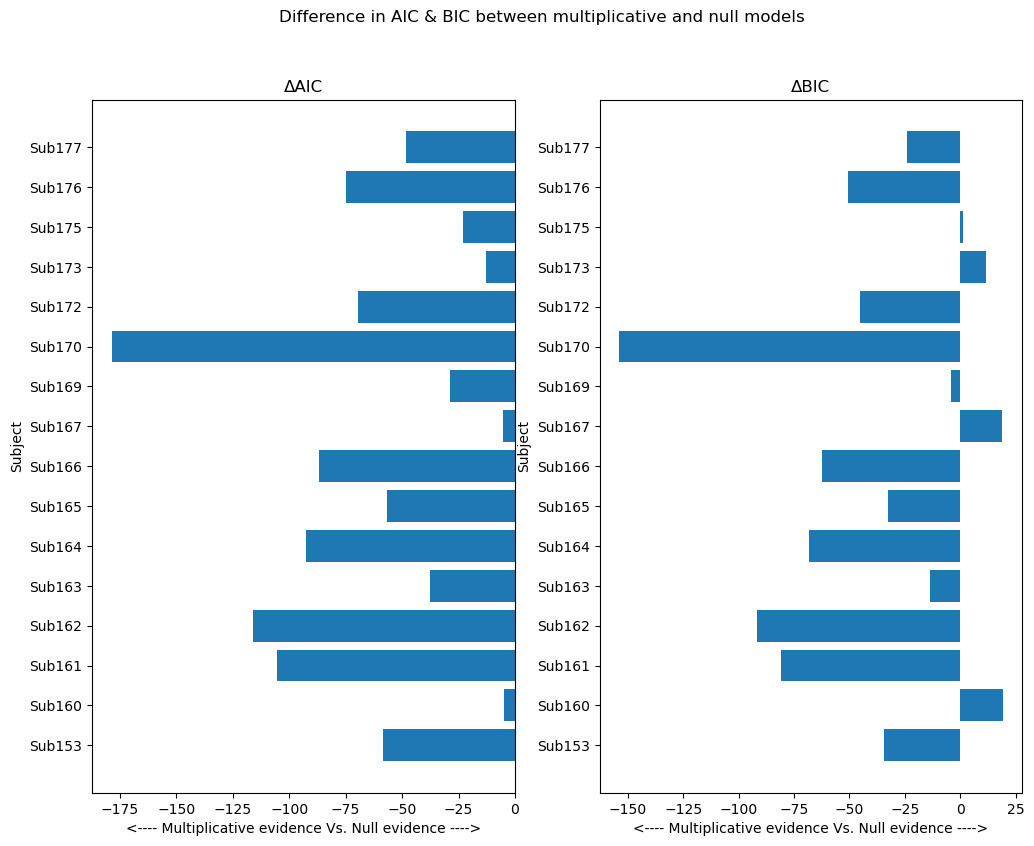

AIC t-test p-value: 7.754016919335013e-05, BIC t-test p-value: 0.0049410129727473365


In [50]:
# Difference in AIC & BIC between multiplicative and null models.
subjectList = []
deltaAICList = []
deltaBICList = []

for key in min_pred.keys():
    if key.startswith("Sub"):
        nll_1 = mul_pred[key][0][8] # negative log likelihood of the multiplicative model.
        nll_2 = null_pred[key][0][1] # negative log likelihood of the null model.
        deltaAIC, deltaBIC = delta_ic(nll_1, nll_2, k_mul, k_null, n)
        subjectList.append(key)
        deltaAICList.append(deltaAIC)
        deltaBICList.append(deltaBIC)

plt.figure(figsize=(12, 9))
plt.suptitle('Difference in AIC & BIC between multiplicative and null models')        

plt.subplot(1, 2, 1)
plt.barh(subjectList, deltaAICList)
plt.title("ΔAIC")
plt.ylabel("Subject")
plt.xlabel("<---- Multiplicative evidence Vs. Null evidence ---->")

plt.subplot(1, 2, 2)
plt.barh(subjectList, deltaBICList)
plt.title("ΔBIC")
plt.ylabel("Subject")
plt.xlabel("<---- Multiplicative evidence Vs. Null evidence ---->")

plt.show()

t_statistic_aic, p_value_aic = stats.ttest_1samp(deltaAICList, 0)
t_statistic_bic, p_value_bic = stats.ttest_1samp(deltaBICList, 0)
print('AIC t-test p-value: ' + str(p_value_aic) + ', BIC t-test p-value: ' + str(p_value_bic))

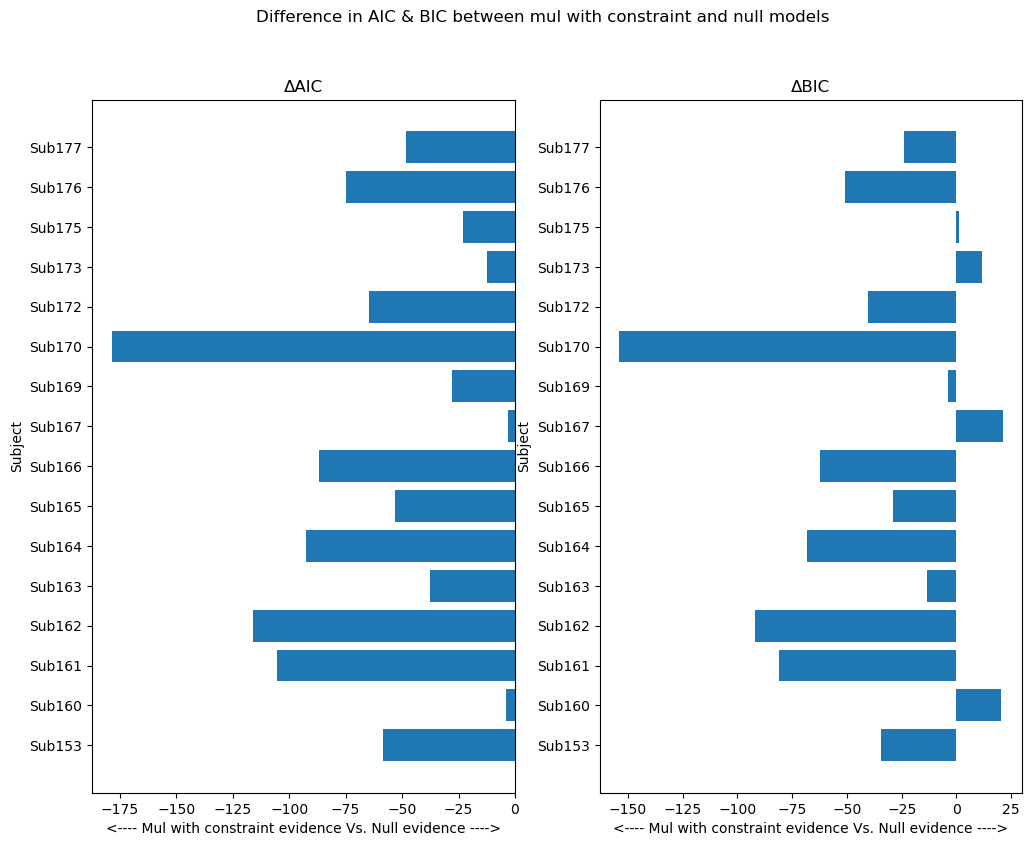

AIC t-test p-value: 9.459991884445425e-05, BIC t-test p-value: 0.005949253047373329


In [49]:
# Difference in AIC & BIC between multiplicative with constraint and null models.
subjectList = []
deltaAICList = []
deltaBICList = []

for key in min_pred.keys():
    if key.startswith("Sub"):
        nll_1 = mul_const_pred[key][0][8] # negative log likelihood of the multiplicative with constraint model.
        nll_2 = null_pred[key][0][1] # negative log likelihood of the null model.
        deltaAIC, deltaBIC = delta_ic(nll_1, nll_2, k_mul, k_null, n)
        subjectList.append(key)
        deltaAICList.append(deltaAIC)
        deltaBICList.append(deltaBIC)

plt.figure(figsize=(12, 9))
plt.suptitle('Difference in AIC & BIC between mul with constraint and null models')        

plt.subplot(1, 2, 1)
plt.barh(subjectList, deltaAICList)
plt.title("ΔAIC")
plt.ylabel("Subject")
plt.xlabel("<---- Mul with constraint evidence Vs. Null evidence ---->")

plt.subplot(1, 2, 2)
plt.barh(subjectList, deltaBICList)
plt.title("ΔBIC")
plt.ylabel("Subject")
plt.xlabel("<---- Mul with constraint evidence Vs. Null evidence ---->")

plt.show()

t_statistic_aic, p_value_aic = stats.ttest_1samp(deltaAICList, 0)
t_statistic_bic, p_value_bic = stats.ttest_1samp(deltaBICList, 0)
print('AIC t-test p-value: ' + str(p_value_aic) + ', BIC t-test p-value: ' + str(p_value_bic))

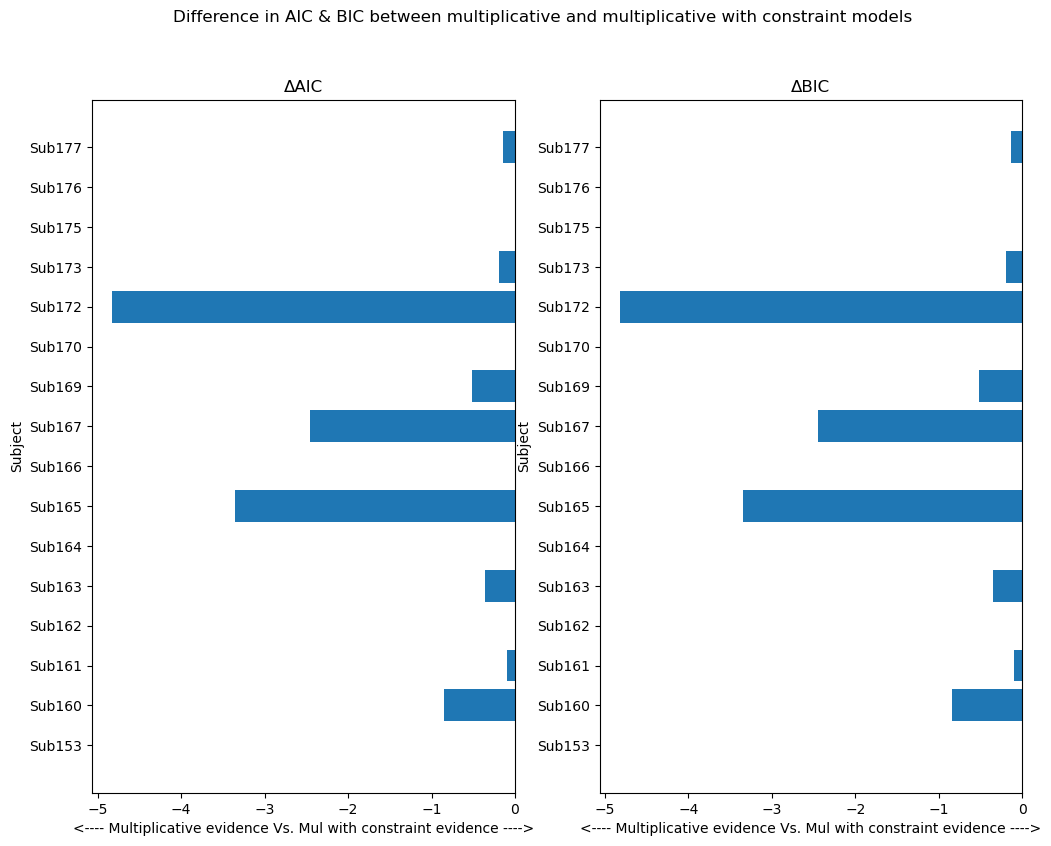

AIC t-test p-value: 0.043526375508164586, BIC t-test p-value: 0.043526375508165904


In [48]:
# Difference in AIC & BIC between multiplicative and multiplicative with constraint models.
subjectList = []
deltaAICList = []
deltaBICList = []

for key in mul_pred.keys():
    if key.startswith("Sub"):
        nll_1 = mul_pred[key][0][8] # negative log likelihood of the multiplicative model.
        nll_2 = mul_const_pred[key][0][8] # negative log likelihood of the multiplicative with constraint model.
        deltaAIC, deltaBIC = delta_ic(nll_1, nll_2, k_mul, k_mul, n)
        subjectList.append(key)
        deltaAICList.append(deltaAIC)
        deltaBICList.append(deltaBIC)

plt.figure(figsize=(12, 9))
plt.suptitle('Difference in AIC & BIC between multiplicative and multiplicative with constraint models')        

plt.subplot(1, 2, 1)
plt.barh(subjectList, deltaAICList)
plt.title("ΔAIC")
plt.ylabel("Subject")
plt.xlabel("<---- Multiplicative evidence Vs. Mul with constraint evidence ---->")

plt.subplot(1, 2, 2)
plt.barh(subjectList, deltaBICList)
plt.title("ΔBIC")
plt.ylabel("Subject")
plt.xlabel("<---- Multiplicative evidence Vs. Mul with constraint evidence ---->")

plt.show()

t_statistic_aic, p_value_aic = stats.ttest_1samp(deltaAICList, 0)
t_statistic_bic, p_value_bic = stats.ttest_1samp(deltaBICList, 0)
print('AIC t-test p-value: ' + str(p_value_aic) + ', BIC t-test p-value: ' + str(p_value_bic))

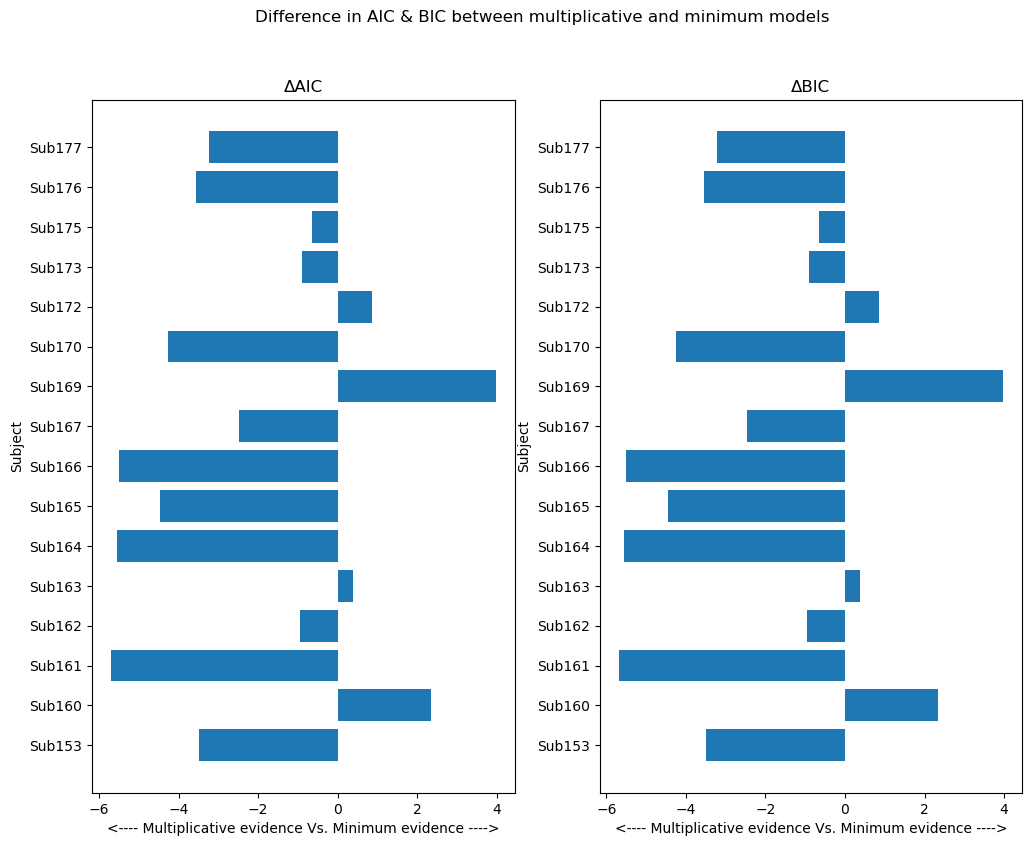

AIC t-test p-value: 0.012612893493620181, BIC t-test p-value: 0.012612893493620658
Power analysis, AIC sample size: 32.30134902714397, BIC sample size: 32.301349027144525


In [63]:
# Difference in AIC & BIC between multiplicative and minimum models.
subjectList = []
deltaAICList = []
deltaBICList = []

for key in min_pred.keys():
    if key.startswith("Sub"):
        nll_1 = mul_pred[key][0][8] # negative log likelihood of the multiplicative model.
        nll_2 = min_pred[key][0][8] # negative log likelihood of the minimum model.
        deltaAIC, deltaBIC = delta_ic(nll_1, nll_2, k_mul, k_min, n)
        subjectList.append(key)
        deltaAICList.append(deltaAIC)
        deltaBICList.append(deltaBIC)

plt.figure(figsize=(12, 9))
plt.suptitle('Difference in AIC & BIC between multiplicative and minimum models')        

plt.subplot(1, 2, 1)
plt.barh(subjectList, deltaAICList)
plt.title("ΔAIC")
plt.ylabel("Subject")
plt.xlabel("<---- Multiplicative evidence Vs. Minimum evidence ---->")

plt.subplot(1, 2, 2)
plt.barh(subjectList, deltaBICList)
plt.title("ΔBIC")
plt.ylabel("Subject")
plt.xlabel("<---- Multiplicative evidence Vs. Minimum evidence ---->")

plt.show()

# one sample t-test 
t_statistic_aic, p_value_aic = stats.ttest_1samp(deltaAICList, 0)
t_statistic_bic, p_value_bic = stats.ttest_1samp(deltaBICList, 0)
print('AIC t-test p-value: ' + str(p_value_aic) + ', BIC t-test p-value: ' + str(p_value_bic))

# power analysis
sample_size_aic = power_analysis(cohens_d_onesample(t_statistic_aic, deltaAICList))
sample_size_bic = power_analysis(cohens_d_onesample(t_statistic_bic, deltaBICList))
print('Power analysis, AIC sample size: ' + str(sample_size_aic) + ', BIC sample size: ' + str(sample_size_bic))

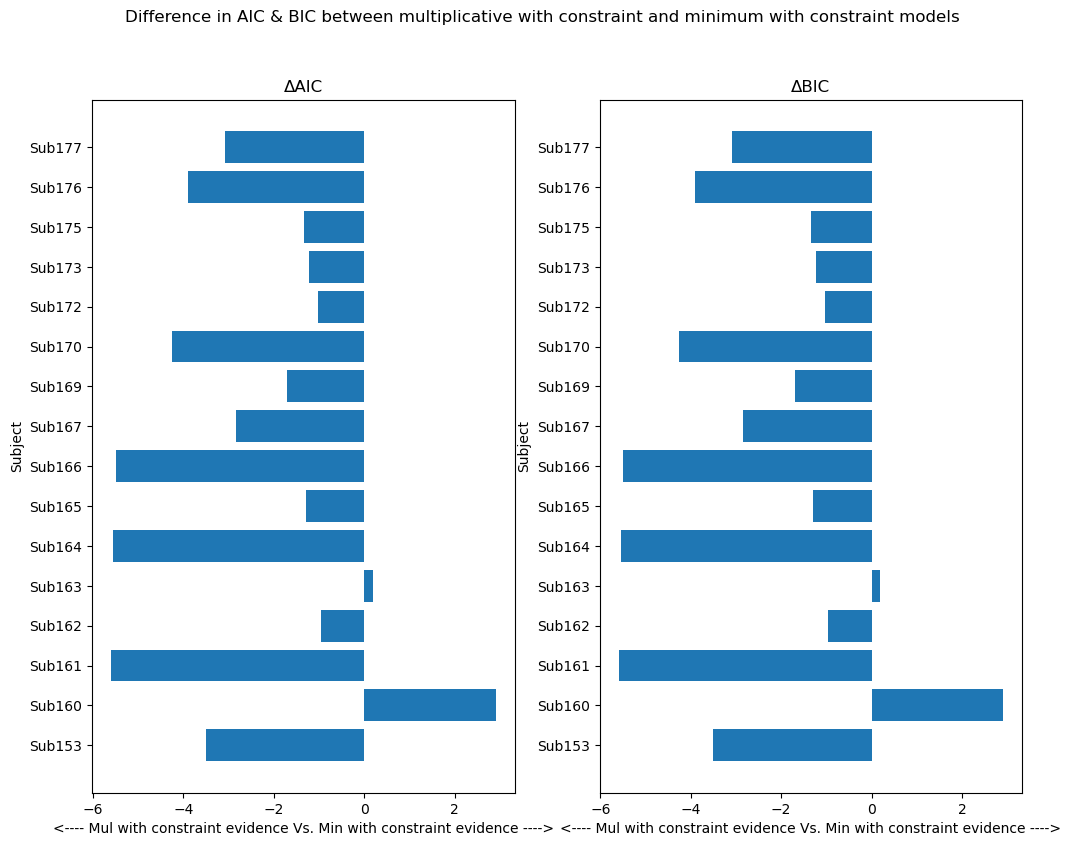

AIC t-test p-value: 0.000808261980476316, BIC t-test p-value: 0.0008082619804763617
Power analysis, AIC sample size: 15.411607848276578, BIC sample size: 15.411607848276846


In [64]:
# Difference in AIC & BIC between multiplicative with constraint and minimum with constraint models.
subjectList = []
deltaAICList = []
deltaBICList = []

for key in min_pred.keys():
    if key.startswith("Sub"):
        nll_1 = mul_const_pred[key][0][8] # negative log likelihood of the multiplicative with constraint model.
        nll_2 = min_const_pred[key][0][8] # negative log likelihood of the minimum with constraint model.
        deltaAIC, deltaBIC = delta_ic(nll_1, nll_2, k_mul, k_min, n)
        subjectList.append(key)
        deltaAICList.append(deltaAIC)
        deltaBICList.append(deltaBIC)

plt.figure(figsize=(12, 9))
plt.suptitle('Difference in AIC & BIC between multiplicative with constraint and minimum with constraint models')        

plt.subplot(1, 2, 1)
plt.barh(subjectList, deltaAICList)
plt.title("ΔAIC")
plt.ylabel("Subject")
plt.xlabel("<---- Mul with constraint evidence Vs. Min with constraint evidence ---->")

plt.subplot(1, 2, 2)
plt.barh(subjectList, deltaBICList)
plt.title("ΔBIC")
plt.ylabel("Subject")
plt.xlabel("<---- Mul with constraint evidence Vs. Min with constraint evidence ---->")

plt.show()

# one-sample t-test
t_statistic_aic, p_value_aic = stats.ttest_1samp(deltaAICList, 0)
t_statistic_bic, p_value_bic = stats.ttest_1samp(deltaBICList, 0)
print('AIC t-test p-value: ' + str(p_value_aic) + ', BIC t-test p-value: ' + str(p_value_bic))

# power analysis
sample_size_aic = power_analysis(cohens_d_onesample(t_statistic_aic, deltaAICList))
sample_size_bic = power_analysis(cohens_d_onesample(t_statistic_bic, deltaBICList))
print('Power analysis, AIC sample size: ' + str(sample_size_aic) + ', BIC sample size: ' + str(sample_size_bic))

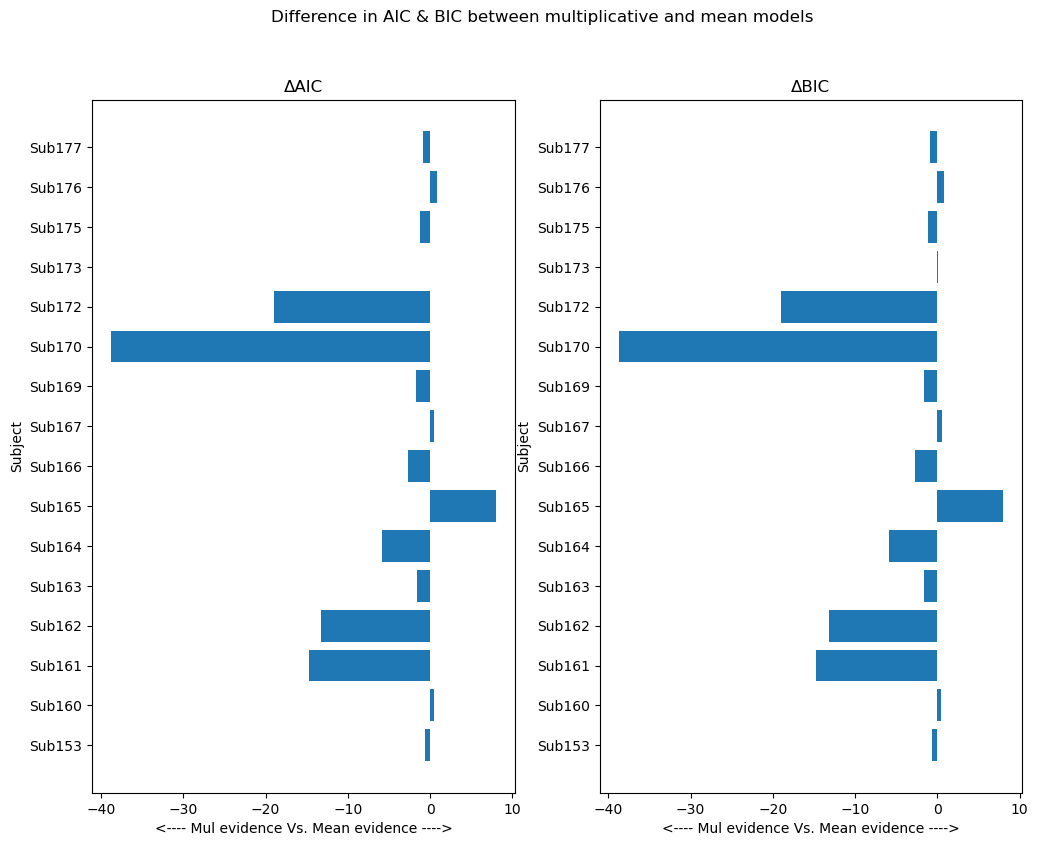

AIC t-test p-value: 0.05983020352103753, BIC t-test p-value: 0.05983020352103823


In [45]:
# Difference in AIC & BIC between multiplicative and mean models.
subjectList = []
deltaAICList = []
deltaBICList = []

for key in min_pred.keys():
    if key.startswith("Sub"):
        nll_1 = mul_pred[key][0][8] # negative log likelihood of the multiplicative model.
        nll_2 = mean_pred[key][0][8] # negative log likelihood of the mean model.
        deltaAIC, deltaBIC = delta_ic(nll_1, nll_2, k_mul, k_mean, n)
        subjectList.append(key)
        deltaAICList.append(deltaAIC)
        deltaBICList.append(deltaBIC)

plt.figure(figsize=(12, 9))
plt.suptitle('Difference in AIC & BIC between multiplicative and mean models')        

plt.subplot(1, 2, 1)
plt.barh(subjectList, deltaAICList)
plt.title("ΔAIC")
plt.ylabel("Subject")
plt.xlabel("<---- Mul evidence Vs. Mean evidence ---->")

plt.subplot(1, 2, 2)
plt.barh(subjectList, deltaBICList)
plt.title("ΔBIC")
plt.ylabel("Subject")
plt.xlabel("<---- Mul evidence Vs. Mean evidence ---->")

plt.show()

# t-test against 0.
t_statistic_aic, p_value_aic = stats.ttest_1samp(deltaAICList, 0)
t_statistic_bic, p_value_bic = stats.ttest_1samp(deltaBICList, 0)
print('AIC t-test p-value: ' + str(p_value_aic) + ', BIC t-test p-value: ' + str(p_value_bic))

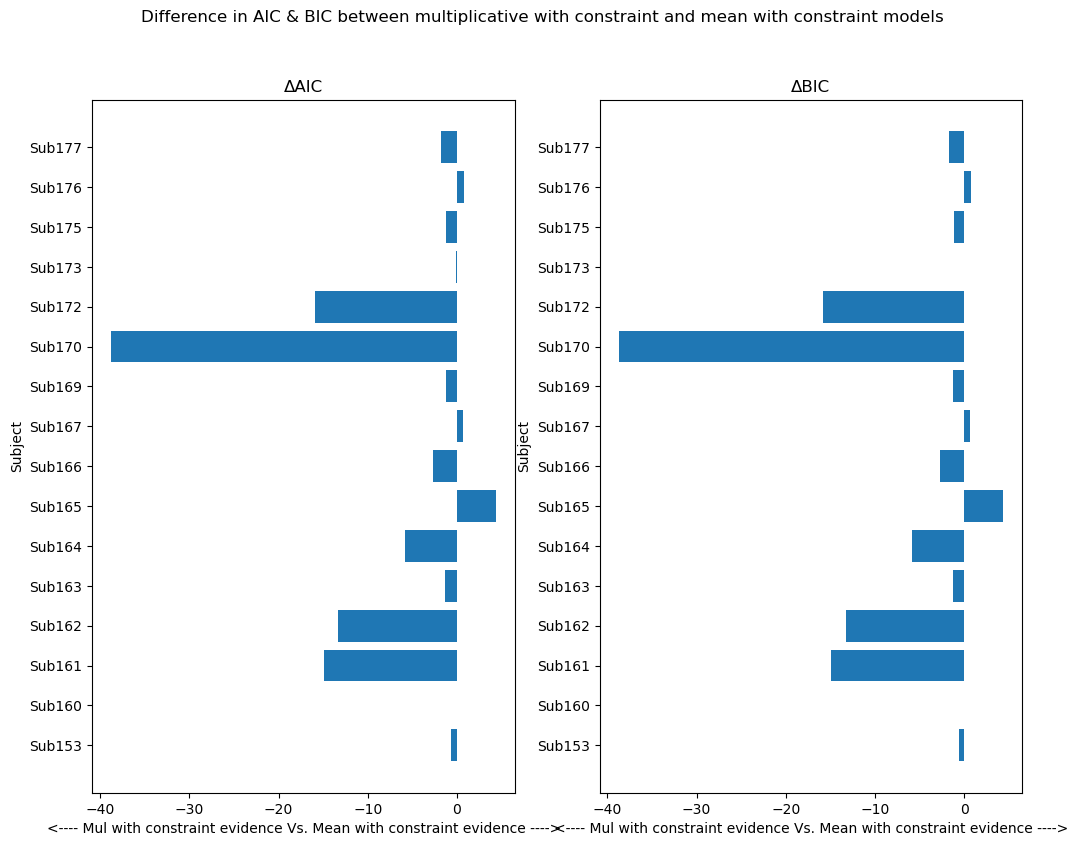

AIC t-test p-value: 0.04738300524612513, BIC t-test p-value: 0.047383005246125084


In [44]:
# Difference in AIC & BIC between multiplicative with constraint and mean with constraint models.
subjectList = []
deltaAICList = []
deltaBICList = []

for key in min_pred.keys():
    if key.startswith("Sub"):
        nll_1 = mul_const_pred[key][0][8] # negative log likelihood of the multiplicative with constraint model.
        nll_2 = mean_const_pred[key][0][8] # negative log likelihood of the mean with constraint model.
        deltaAIC, deltaBIC = delta_ic(nll_1, nll_2, k_mul, k_mean, n)
        subjectList.append(key)
        deltaAICList.append(deltaAIC)
        deltaBICList.append(deltaBIC)

plt.figure(figsize=(12, 9))
plt.suptitle('Difference in AIC & BIC between multiplicative with constraint and mean with constraint models')        

plt.subplot(1, 2, 1)
plt.barh(subjectList, deltaAICList)
plt.title("ΔAIC")
plt.ylabel("Subject")
plt.xlabel("<---- Mul with constraint evidence Vs. Mean with constraint evidence ---->")

plt.subplot(1, 2, 2)
plt.barh(subjectList, deltaBICList)
plt.title("ΔBIC")
plt.ylabel("Subject")
plt.xlabel("<---- Mul with constraint evidence Vs. Mean with constraint evidence ---->")

plt.show()

t_statistic_aic, p_value_aic = stats.ttest_1samp(deltaAICList, 0)
t_statistic_bic, p_value_bic = stats.ttest_1samp(deltaBICList, 0)
print('AIC t-test p-value: ' + str(p_value_aic) + ', BIC t-test p-value: ' + str(p_value_bic))

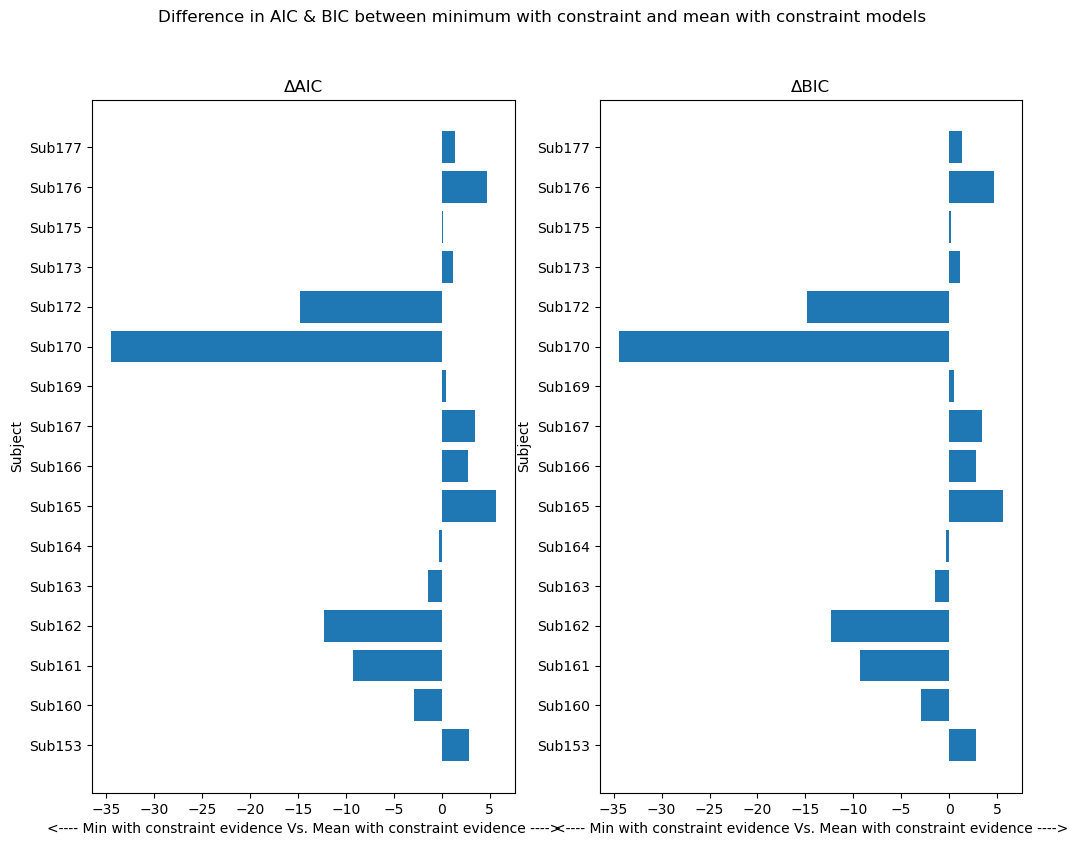

AIC t-test p-value: 0.21344404953506835, BIC t-test p-value: 0.2134440495350669


In [43]:
# Difference in AIC & BIC between minimum with constraint and mean with constraint models.
subjectList = []
deltaAICList = []
deltaBICList = []

for key in min_pred.keys():
    if key.startswith("Sub"):
        nll_1 = min_const_pred[key][0][8] # negative log likelihood of the minimum with constraint model.
        nll_2 = mean_const_pred[key][0][8] # negative log likelihood of the mean with constraint model.
        deltaAIC, deltaBIC = delta_ic(nll_1, nll_2, k_min, k_mean, n)
        subjectList.append(key)
        deltaAICList.append(deltaAIC)
        deltaBICList.append(deltaBIC)

plt.figure(figsize=(12, 9))
plt.suptitle('Difference in AIC & BIC between minimum with constraint and mean with constraint models')        

plt.subplot(1, 2, 1)
plt.barh(subjectList, deltaAICList)
plt.title("ΔAIC")
plt.ylabel("Subject")
plt.xlabel("<---- Min with constraint evidence Vs. Mean with constraint evidence ---->")

plt.subplot(1, 2, 2)
plt.barh(subjectList, deltaBICList)
plt.title("ΔBIC")
plt.ylabel("Subject")
plt.xlabel("<---- Min with constraint evidence Vs. Mean with constraint evidence ---->")

plt.show()

t_statistic_aic, p_value_aic = stats.ttest_1samp(deltaAICList, 0)
t_statistic_bic, p_value_bic = stats.ttest_1samp(deltaBICList, 0)
print('AIC t-test p-value: ' + str(p_value_aic) + ', BIC t-test p-value: ' + str(p_value_bic))

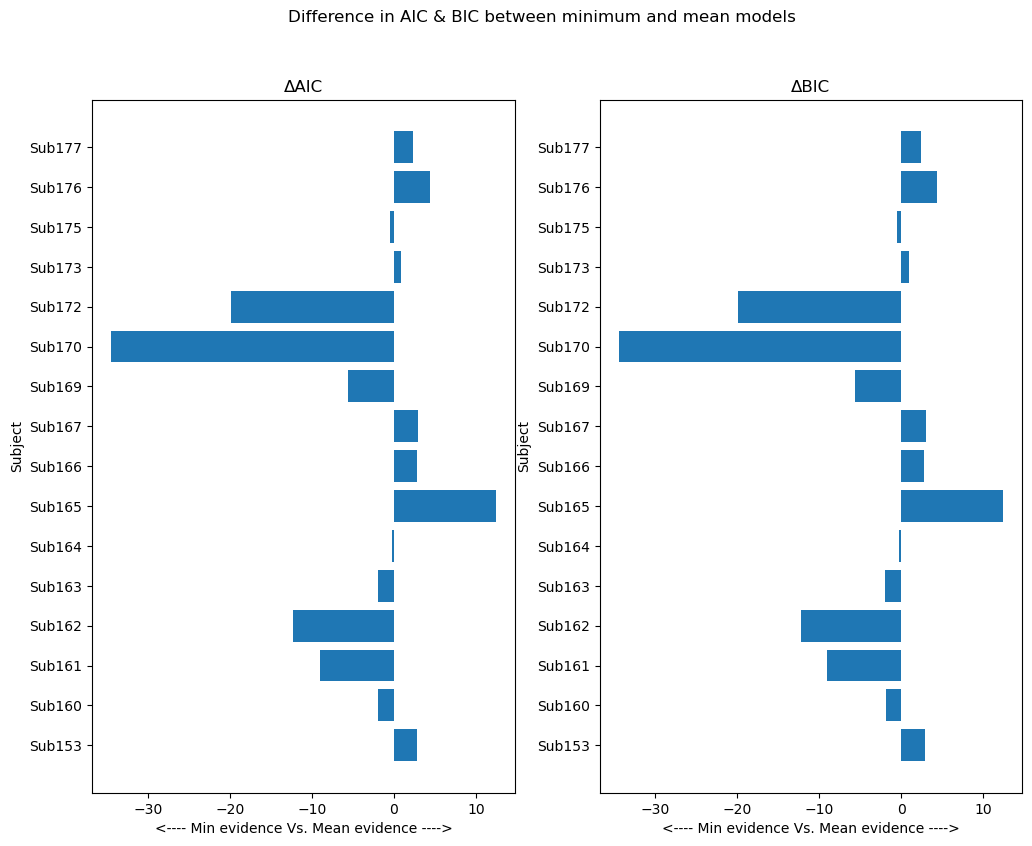

AIC t-test p-value: 0.21620086749950676, BIC t-test p-value: 0.2162008674995074


In [42]:
# Difference in AIC & BIC between minimum and mean models.
subjectList = []
deltaAICList = []
deltaBICList = []

for key in min_pred.keys():
    if key.startswith("Sub"):
        nll_1 = min_pred[key][0][8] # negative log likelihood of the minimum model.
        nll_2 = mean_pred[key][0][8] # negative log likelihood of the mean model.
        deltaAIC, deltaBIC = delta_ic(nll_1, nll_2, k_min, k_mean, n)
        subjectList.append(key)
        deltaAICList.append(deltaAIC)
        deltaBICList.append(deltaBIC)

plt.figure(figsize=(12, 9))
plt.suptitle('Difference in AIC & BIC between minimum and mean models')        

plt.subplot(1, 2, 1)
plt.barh(subjectList, deltaAICList)
plt.title("ΔAIC")
plt.ylabel("Subject")
plt.xlabel("<---- Min evidence Vs. Mean evidence ---->")

plt.subplot(1, 2, 2)
plt.barh(subjectList, deltaBICList)
plt.title("ΔBIC")
plt.ylabel("Subject")
plt.xlabel("<---- Min evidence Vs. Mean evidence ---->")

plt.show()

t_statistic_aic, p_value_aic = stats.ttest_1samp(deltaAICList, 0)
t_statistic_bic, p_value_bic = stats.ttest_1samp(deltaBICList, 0)
print('AIC t-test p-value: ' + str(p_value_aic) + ', BIC t-test p-value: ' + str(p_value_bic))

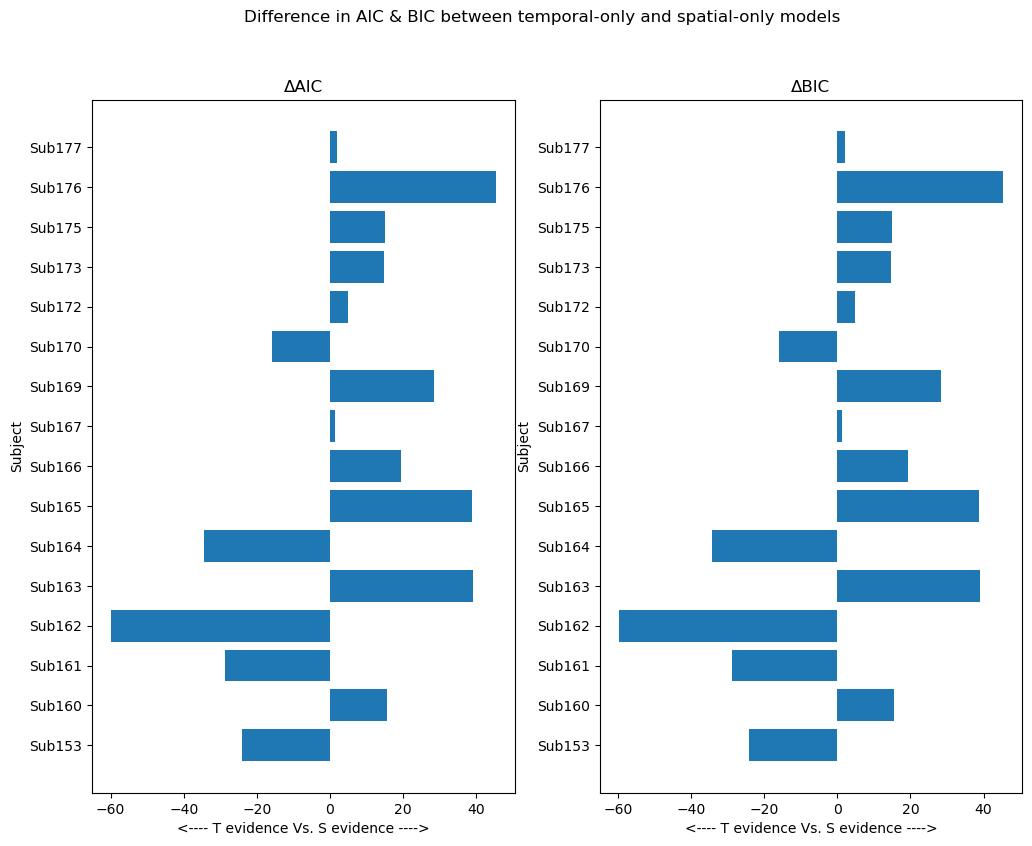

AIC t-test p-value: 0.612527062375797, BIC t-test p-value: 0.612527062375797


In [41]:
# Difference in AIC & BIC between temporal-only and spatial-only models.
subjectList = []
deltaAICList = []
deltaBICList = []

for key in min_pred.keys():
    if key.startswith("Sub"):
        nll_1 = tOnly_pred[key][0][4] # negative log likelihood of the temporal-only model.
        nll_2 = sOnly_pred[key][0][4] # negative log likelihood of the spatial-only model.
        deltaAIC, deltaBIC = delta_ic(nll_1, nll_2, k_tonly, k_sonly, n)
        subjectList.append(key)
        deltaAICList.append(deltaAIC)
        deltaBICList.append(deltaBIC)

plt.figure(figsize=(12, 9))
plt.suptitle('Difference in AIC & BIC between temporal-only and spatial-only models')        

plt.subplot(1, 2, 1)
plt.barh(subjectList, deltaAICList)
plt.title("ΔAIC")
plt.ylabel("Subject")
plt.xlabel("<---- T evidence Vs. S evidence ---->")

plt.subplot(1, 2, 2)
plt.barh(subjectList, deltaBICList)
plt.title("ΔBIC")
plt.ylabel("Subject")
plt.xlabel("<---- T evidence Vs. S evidence ---->")

plt.show()

t_statistic_aic, p_value_aic = stats.ttest_1samp(deltaAICList, 0)
t_statistic_bic, p_value_bic = stats.ttest_1samp(deltaBICList, 0)
print('AIC t-test p-value: ' + str(p_value_aic) + ', BIC t-test p-value: ' + str(p_value_bic))

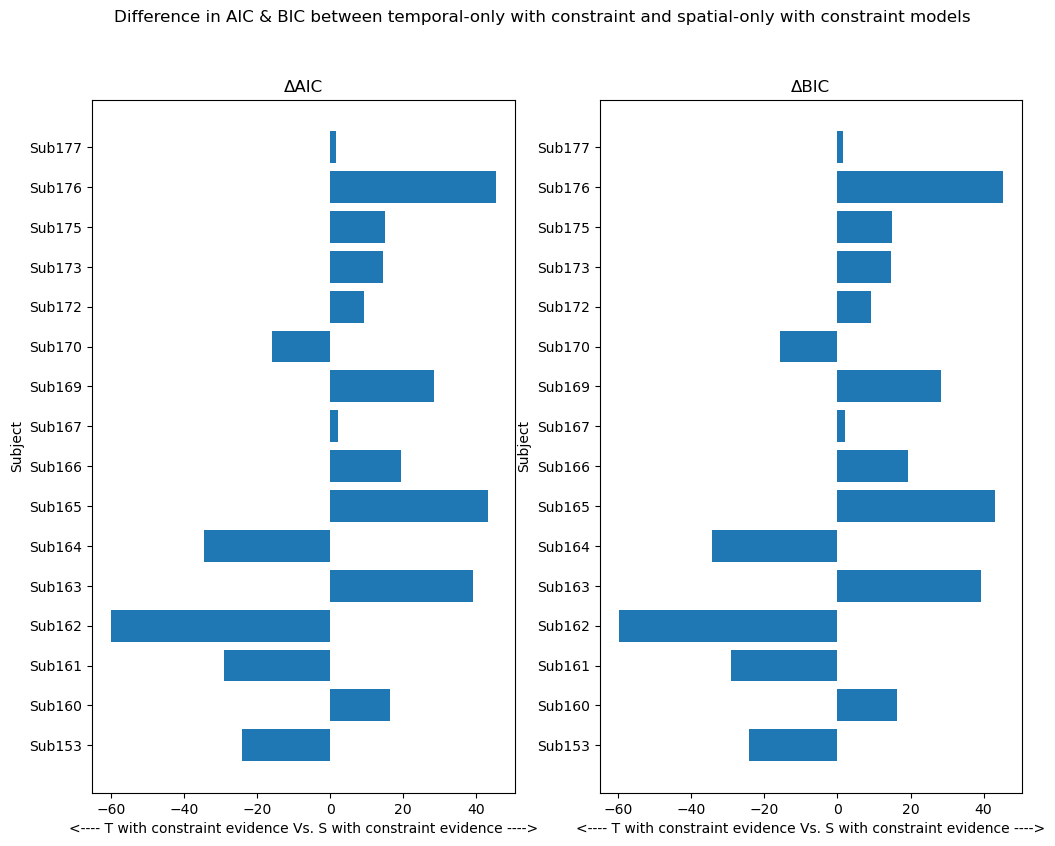

AIC t-test p-value: 0.5625126705635146, BIC t-test p-value: 0.5625126705635146


In [40]:
# Difference in AIC & BIC between temporal-only with constraint and spatial-only with constraint models.
subjectList = []
deltaAICList = []
deltaBICList = []

for key in min_pred.keys():
    if key.startswith("Sub"):
        nll_1 = tOnly_const_pred[key][0][4] # negative log likelihood of the temporal-only with constraint model.
        nll_2 = sOnly_const_pred[key][0][4] # negative log likelihood of the spatial-only with constraint model.
        deltaAIC, deltaBIC = delta_ic(nll_1, nll_2, k_tonly, k_sonly, n)
        subjectList.append(key)
        deltaAICList.append(deltaAIC)
        deltaBICList.append(deltaBIC)

plt.figure(figsize=(12, 9))
plt.suptitle('Difference in AIC & BIC between temporal-only with constraint and spatial-only with constraint models')        

plt.subplot(1, 2, 1)
plt.barh(subjectList, deltaAICList)
plt.title("ΔAIC")
plt.ylabel("Subject")
plt.xlabel("<---- T with constraint evidence Vs. S with constraint evidence ---->")

plt.subplot(1, 2, 2)
plt.barh(subjectList, deltaBICList)
plt.title("ΔBIC")
plt.ylabel("Subject")
plt.xlabel("<---- T with constraint evidence Vs. S with constraint evidence ---->")

plt.show()

t_statistic_aic, p_value_aic = stats.ttest_1samp(deltaAICList, 0)
t_statistic_bic, p_value_bic = stats.ttest_1samp(deltaBICList, 0)
print('AIC t-test p-value: ' + str(p_value_aic) + ', BIC t-test p-value: ' + str(p_value_bic))

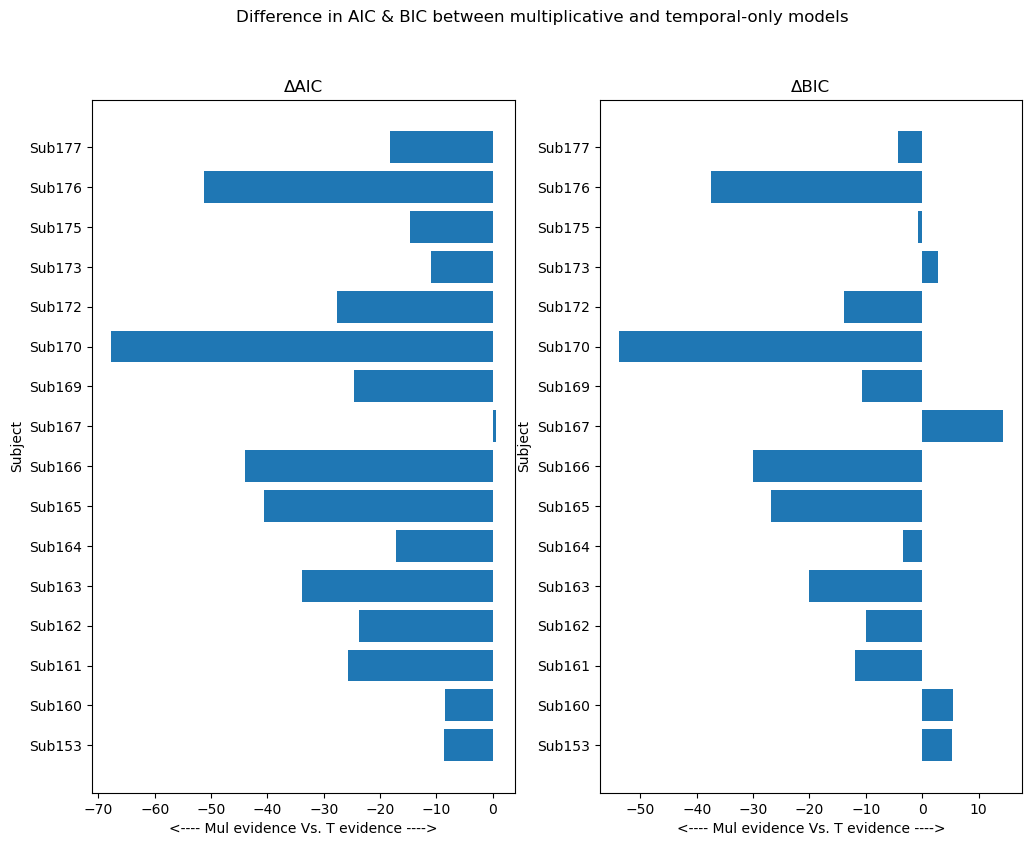

AIC t-test p-value: 3.3373131047951184e-05, BIC t-test p-value: 0.015429209744795867


In [39]:
# Difference in AIC & BIC between multiplicative and temporal-only models.
subjectList = []
deltaAICList = []
deltaBICList = []

for key in min_pred.keys():
    if key.startswith("Sub"):
        nll_1 = mul_pred[key][0][8] # negative log likelihood of the multiplicative model.
        nll_2 = tOnly_pred[key][0][4] # negative log likelihood of the temporal-only model.
        deltaAIC, deltaBIC = delta_ic(nll_1, nll_2, k_mul, k_tonly, n)
        subjectList.append(key)
        deltaAICList.append(deltaAIC)
        deltaBICList.append(deltaBIC)

plt.figure(figsize=(12, 9))
plt.suptitle('Difference in AIC & BIC between multiplicative and temporal-only models')        

plt.subplot(1, 2, 1)
plt.barh(subjectList, deltaAICList)
plt.title("ΔAIC")
plt.ylabel("Subject")
plt.xlabel("<---- Mul evidence Vs. T evidence ---->")

plt.subplot(1, 2, 2)
plt.barh(subjectList, deltaBICList)
plt.title("ΔBIC")
plt.ylabel("Subject")
plt.xlabel("<---- Mul evidence Vs. T evidence ---->")

plt.show()

t_statistic_aic, p_value_aic = stats.ttest_1samp(deltaAICList, 0)
t_statistic_bic, p_value_bic = stats.ttest_1samp(deltaBICList, 0)
print('AIC t-test p-value: ' + str(p_value_aic) + ', BIC t-test p-value: ' + str(p_value_bic))

In [38]:
# Difference in AIC & BIC between multiplicative with constraint and temporal-only with constraint models.
subjectList = []
deltaAICList = []
deltaBICList = []

for key in min_pred.keys():
    if key.startswith("Sub"):
        nll_1 = mul_const_pred[key][0][8] # negative log likelihood of the multiplicative with constraint model.
        nll_2 = tOnly_const_pred[key][0][4] # negative log likelihood of the temporal-only with constraint model.
        deltaAIC, deltaBIC = delta_ic(nll_1, nll_2, k_mul, k_tonly, n)
        subjectList.append(key)
        deltaAICList.append(deltaAIC)
        deltaBICList.append(deltaBIC)

plt.figure(figsize=(12, 9))
plt.suptitle('Difference in AIC & BIC between multiplicative with constraint and temporal-only with constraint models')        

plt.subplot(1, 2, 1)
plt.barh(subjectList, deltaAICList)
plt.title("ΔAIC")
plt.ylabel("Subject")
plt.xlabel("<---- Mul with constraint evidence Vs. T with constraint evidence ---->")

plt.subplot(1, 2, 2)
plt.barh(subjectList, deltaBICList)
plt.title("ΔBIC")
plt.ylabel("Subject")
plt.xlabel("<---- Mul with constraint evidence Vs. T with constraint evidence ---->")

plt.show()

t_statistic_aic, p_value_aic = stats.ttest_1samp(deltaAICList, 0)
t_statistic_bic, p_value_bic = stats.ttest_1samp(deltaBICList, 0)
print('AIC t-test p-value: ' + str(p_value_aic) + ', BIC t-test p-value: ' + str(p_value_bic))

AIC t-test p-value: 3.792750875337355e-05, BIC t-test p-value: 0.016797006670899995


In [37]:
# Difference in AIC & BIC between multiplicative and spatial-only models.
subjectList = []
deltaAICList = []
deltaBICList = []

for key in min_pred.keys():
    if key.startswith("Sub"):
        nll_1 = mul_pred[key][0][8] # negative log likelihood of the multiplicative model.
        nll_2 = sOnly_pred[key][0][4] # negative log likelihood of the spatial-only model.
        deltaAIC, deltaBIC = delta_ic(nll_1, nll_2, k_mul, k_sonly, n)
        subjectList.append(key)
        deltaAICList.append(deltaAIC)
        deltaBICList.append(deltaBIC)

plt.figure(figsize=(12, 9))
plt.suptitle('Difference in AIC & BIC between multiplicative and spatial-only models')        

plt.subplot(1, 2, 1)
plt.barh(subjectList, deltaAICList)
plt.title("ΔAIC")
plt.ylabel("Subject")
plt.xlabel("<---- Mul evidence Vs. S evidence ---->")

plt.subplot(1, 2, 2)
plt.barh(subjectList, deltaBICList)
plt.title("ΔBIC")
plt.ylabel("Subject")
plt.xlabel("<---- Mul evidence Vs. S evidence ---->")

plt.show()

t_statistic_aic, p_value_aic = stats.ttest_1samp(deltaAICList, 0)
t_statistic_bic, p_value_bic = stats.ttest_1samp(deltaBICList, 0)
print('AIC t-test p-value: ' + str(p_value_aic) + ', BIC t-test p-value: ' + str(p_value_bic))

AIC t-test p-value: 0.01151400459365845, BIC t-test p-value: 0.29466671389147076


In [36]:
# Difference in AIC & BIC between multiplicative with constraint and spatial-only with constraint models.
subjectList = []
deltaAICList = []
deltaBICList = []

for key in min_pred.keys():
    if key.startswith("Sub"):
        nll_1 = mul_const_pred[key][0][8] # negative log likelihood of the multiplicative with constraint model.
        nll_2 = sOnly_const_pred[key][0][4] # negative log likelihood of the spatial-only with constraint model.
        deltaAIC, deltaBIC = delta_ic(nll_1, nll_2, k_mul, k_sonly, n)
        subjectList.append(key)
        deltaAICList.append(deltaAIC)
        deltaBICList.append(deltaBIC)

plt.figure(figsize=(12, 9))
plt.suptitle('Difference in AIC & BIC between multiplicative with constraint and spatial-only with constraint models')        

plt.subplot(1, 2, 1)
plt.barh(subjectList, deltaAICList)
plt.title("ΔAIC")
plt.ylabel("Subject")
plt.xlabel("<---- Mul with constraint evidence Vs. S with constraint evidence ---->")

plt.subplot(1, 2, 2)
plt.barh(subjectList, deltaBICList)
plt.title("ΔBIC")
plt.ylabel("Subject")
plt.xlabel("<---- Mul with constraint evidence Vs. S with constraint evidence ---->")

plt.show()

t_statistic_aic, p_value_aic = stats.ttest_1samp(deltaAICList, 0)
t_statistic_bic, p_value_bic = stats.ttest_1samp(deltaBICList, 0)
print('AIC t-test p-value: ' + str(p_value_aic) + ', BIC t-test p-value: ' + str(p_value_bic))

AIC t-test p-value: 0.014795571291447665, BIC t-test p-value: 0.3412052302577333


In [35]:
# Negative log-likelihood scores for subject 160 for the multiplicative with constraint and spatial-only with constraint
print(mul_pred['Sub160'][0][8])
print(sOnly_pred['Sub160'][0][4])

138.81078322032266
139.24486366005732
